In [1]:
import argparse
import easydict
from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [2]:
# import random

# RandomListOfIntegers = [random.randint(0, 99999) for iter in range(5)]
# print(RandomListOfIntegers)

[64711, 77724, 99660, 94154, 15206]


In [2]:
RandomListOfIntegers = [64711, 77724, 99660, 94154, 15206]

# 40 % drop

In [3]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 0
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'greedy',k=0.8)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified
num_pruned 13
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49]
num_pruned 13
indices_pruned !!!  [11, 55, 48, 13, 0, 7, 44, 53, 21, 1, 23, 50, 2]
num_pruned 26
indices_pruned !!!  [1, 7, 73, 127, 116, 74, 101, 23, 99, 105, 97, 84, 100, 57, 47, 56, 75, 69, 42, 33, 109, 71, 25, 120, 113, 32]
num_pruned 26
indices_pruned !!!  [113, 33, 1, 125, 27, 88, 81, 82, 43, 15, 8, 97, 73, 32, 89, 98, 0, 101, 118, 53, 122, 92, 6, 93, 110, 13]
num_pruned 52
indices_pruned !!!  [137, 122, 18, 201, 221, 187, 166, 2, 176, 199, 142, 78, 110, 89, 6, 220, 101, 54, 151, 180, 224, 66, 154, 86, 205, 13, 83, 191, 198, 225, 44, 183, 178, 4, 49, 115, 12, 244, 238, 50, 111, 69, 175, 26, 21, 131, 99, 100, 146, 129, 52, 144]
num_pruned 52
indices_pruned !!!  [94, 205, 189, 249, 233, 176, 168, 166, 36, 7, 42, 95, 74, 123, 126, 44, 164, 111, 128, 101, 46, 96, 23, 137, 235, 31, 1, 80, 117, 237, 131, 135, 220, 61, 116, 76, 156, 66, 227, 210, 108, 161, 132, 18

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.780642675316852	Top1 Acc: 0.38492000003814697


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.0027507649192327	Top1 Acc: 0.5363


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.1605668574038064	Top1 Acc: 0.6958400000381469


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.8167552766920645	Top1 Acc: 0.6308


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.2090912712809374	Top1 Acc: 0.7772


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.3879832361317888	Top1 Acc: 0.6651


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.8354437933553516	Top1 Acc: 0.811700000038147


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2764680959001373	Top1 Acc: 0.6764


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.6581969537850841	Top1 Acc: 0.8398400000190734


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2551615954954414	Top1 Acc: 0.6767


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.5731765939603986	Top1 Acc: 0.850980000038147


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2469456671159478	Top1 Acc: 0.682


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.4965832324893883	Top1 Acc: 0.8675000000572205


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.2538748549509653	Top1 Acc: 0.6878


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.453825597339274	Top1 Acc: 0.8773400000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.251157954523835	Top1 Acc: 0.6897


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.40931626677970445	Top1 Acc: 0.8876


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.270003919360004	Top1 Acc: 0.691


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.37227761932193776	Top1 Acc: 0.8957200000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.2936093822310242	Top1 Acc: 0.688


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.3485302292477444	Top1 Acc: 0.9017200000572204


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.2953987385653243	Top1 Acc: 0.688


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.3206067166441237	Top1 Acc: 0.90856


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3133043345016768	Top1 Acc: 0.6869


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.3051306753969558	Top1 Acc: 0.9129199999809265


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.330617372748218	Top1 Acc: 0.6878


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.284363002004221	Top1 Acc: 0.9183999999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.334801270991941	Top1 Acc: 0.6921


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.2629954925049906	Top1 Acc: 0.9245799999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.3426476739629913	Top1 Acc: 0.6959


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.24584833069530596	Top1 Acc: 0.9299800000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3584645186798483	Top1 Acc: 0.6886


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.2414256722077994	Top1 Acc: 0.9302800000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3703487741796276	Top1 Acc: 0.69


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.22822894035931438	Top1 Acc: 0.9338000000572204


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3578385642812223	Top1 Acc: 0.6918


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.22009957511254283	Top1 Acc: 0.93594


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.3833707239054427	Top1 Acc: 0.6907


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.20438317622979887	Top1 Acc: 0.9405599999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3818269213543664	Top1 Acc: 0.6938


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.19612440966126865	Top1 Acc: 0.942980000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3917718318444263	Top1 Acc: 0.6957


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.18419326361640334	Top1 Acc: 0.9468400000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3981727769103232	Top1 Acc: 0.6942


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.17646350448622422	Top1 Acc: 0.948960000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4087968732737288	Top1 Acc: 0.6963


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.17548806656656973	Top1 Acc: 0.948740000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4363090056407302	Top1 Acc: 0.6903


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.16124602266208596	Top1 Acc: 0.9540800000190734


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.42942418705059	Top1 Acc: 0.6921


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.16214800684157846	Top1 Acc: 0.9524400000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4381699101834358	Top1 Acc: 0.6928


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.15344330137762266	Top1 Acc: 0.9551600000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4415919984443277	Top1 Acc: 0.6939


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.1480686972989603	Top1 Acc: 0.9574999999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4597545998005927	Top1 Acc: 0.6955


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.14758387955901264	Top1 Acc: 0.9569200000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.452968665316135	Top1 Acc: 0.6974


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.1461204220743283	Top1 Acc: 0.95844


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4510644870468332	Top1 Acc: 0.6969


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.13340086194560352	Top1 Acc: 0.9614399999809266


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.462365738198727	Top1 Acc: 0.6942


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.1309051645247985	Top1 Acc: 0.9633799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4656700401366511	Top1 Acc: 0.6957


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.12488678662711397	Top1 Acc: 0.9642800000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4529668560510949	Top1 Acc: 0.6989


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.12140695255754701	Top1 Acc: 0.964940000038147


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4689947155457508	Top1 Acc: 0.6988


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.11831670267807554	Top1 Acc: 0.9661799999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4790726024893266	Top1 Acc: 0.6971


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.11411803828842958	Top1 Acc: 0.967080000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4904719470422478	Top1 Acc: 0.6962


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.1138069438926704	Top1 Acc: 0.966980000038147


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4902954591980464	Top1 Acc: 0.6955


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.11196466425762457	Top1 Acc: 0.9675


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4788312723365011	Top1 Acc: 0.6975


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.10614270551125411	Top1 Acc: 0.96896


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4815022349357605	Top1 Acc: 0.6988


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.1074970872963176	Top1 Acc: 0.9686999999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4970231214656105	Top1 Acc: 0.6999


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.10128257878105659	Top1 Acc: 0.9711800000572205


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5096219370636759	Top1 Acc: 0.6958


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.09937122197407286	Top1 Acc: 0.9714800000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.493526491937758	Top1 Acc: 0.6998


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.09721417545491015	Top1 Acc: 0.972560000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4970464766780032	Top1 Acc: 0.6991


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.09348263696331502	Top1 Acc: 0.973560000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.4871374134775959	Top1 Acc: 0.7005


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.0905825998491186	Top1 Acc: 0.97406


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5122652129281926	Top1 Acc: 0.6964


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.08921413958701484	Top1 Acc: 0.9742200000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5311330375792105	Top1 Acc: 0.6965


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.08560723229728238	Top1 Acc: 0.976260000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5156821827345257	Top1 Acc: 0.6969


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.08574795341857559	Top1 Acc: 0.9754600000381469


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5147281621075883	Top1 Acc: 0.7009


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.08467510538866453	Top1 Acc: 0.975720000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5292961974687214	Top1 Acc: 0.6955


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.08289243126540538	Top1 Acc: 0.9760400000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5221793825113321	Top1 Acc: 0.6987


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.08463209362514794	Top1 Acc: 0.9757400000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5273684723467766	Top1 Acc: 0.6986


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.07921489230964494	Top1 Acc: 0.977220000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5324784313576132	Top1 Acc: 0.6971


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.08138336788605699	Top1 Acc: 0.976220000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5452255682100224	Top1 Acc: 0.6975


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.07738210217517508	Top1 Acc: 0.978560000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5485689217531229	Top1 Acc: 0.6962


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.081746898577227	Top1 Acc: 0.9766199999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5442186993888662	Top1 Acc: 0.6962


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.07653302862487561	Top1 Acc: 0.9781200000572204


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.545343414137635	Top1 Acc: 0.6987


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.07393121158899478	Top1 Acc: 0.9790000000572204


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5343947833097433	Top1 Acc: 0.6996


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.07137670077364464	Top1 Acc: 0.9796399999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.537938961499854	Top1 Acc: 0.698


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.07641329126351554	Top1 Acc: 0.977740000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.546683955041668	Top1 Acc: 0.6971


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.07404106445467609	Top1 Acc: 0.97852


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.550762316094169	Top1 Acc: 0.6934


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.07269382755250653	Top1 Acc: 0.97894


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5408887070945547	Top1 Acc: 0.6969


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.0709714432392279	Top1 Acc: 0.9794399999809266


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5435510768166072	Top1 Acc: 0.6966


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.07015505195130854	Top1 Acc: 0.9798400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5593994456001474	Top1 Acc: 0.6956


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.06988638531311851	Top1 Acc: 0.980440000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5603961567335491	Top1 Acc: 0.6977


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.068059669507434	Top1 Acc: 0.9811400000381469


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.559243043766746	Top1 Acc: 0.694


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.06726371255153052	Top1 Acc: 0.9805


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5494020679329015	Top1 Acc: 0.6966


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.0648712789582665	Top1 Acc: 0.9813600000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5612970899931993	Top1 Acc: 0.6964


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.060725437203312624	Top1 Acc: 0.9828400000572205


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.572444827496251	Top1 Acc: 0.6968


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.06228882917786575	Top1 Acc: 0.9824200000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5681866943081724	Top1 Acc: 0.696


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.06553397132822163	Top1 Acc: 0.981400000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5582792985288403	Top1 Acc: 0.6979


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.06279296018040317	Top1 Acc: 0.9816600000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5763108556783652	Top1 Acc: 0.6949


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.06284773548293258	Top1 Acc: 0.982860000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.573504158967658	Top1 Acc: 0.6976


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.05999535916234983	Top1 Acc: 0.9833400000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5650034426133843	Top1 Acc: 0.6958


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.06184412789104692	Top1 Acc: 0.9822200000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5796710448929026	Top1 Acc: 0.6962


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.059327919905543175	Top1 Acc: 0.9824


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5712780296048032	Top1 Acc: 0.6958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.057830348961017165	Top1 Acc: 0.9836200000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5683212793326076	Top1 Acc: 0.7003


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.059706597272163764	Top1 Acc: 0.9832000000572204


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.567888249324847	Top1 Acc: 0.6989


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.056063007908727966	Top1 Acc: 0.98404


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5781960879700094	Top1 Acc: 0.697


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.05420314934571533	Top1 Acc: 0.9843000000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.5863115266908574	Top1 Acc: 0.6951


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.054912636461465256	Top1 Acc: 0.9845400000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5914653886722614	Top1 Acc: 0.6966


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.0572160016411863	Top1 Acc: 0.9836000000190734


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5921555583990072	Top1 Acc: 0.6955


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.05444043889270186	Top1 Acc: 0.98476


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.5996001641961592	Top1 Acc: 0.6922


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.05486514314632777	Top1 Acc: 0.984220000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.5997547092317026	Top1 Acc: 0.6985


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.05150562538372357	Top1 Acc: 0.9857799999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.5952731167213827	Top1 Acc: 0.697


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.051139799246797936	Top1 Acc: 0.9862200000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.5880509313148787	Top1 Acc: 0.6979


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.0516722891825106	Top1 Acc: 0.98588


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.5822892513456224	Top1 Acc: 0.7011


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.05132821131178447	Top1 Acc: 0.985520000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.578937045381039	Top1 Acc: 0.7021


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.053101199719568955	Top1 Acc: 0.9847600000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.5822014982187296	Top1 Acc: 0.6986


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.04790917115376505	Top1 Acc: 0.9869800000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.5840771764139585	Top1 Acc: 0.7014


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.04731282306944623	Top1 Acc: 0.986700000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.5832316913182223	Top1 Acc: 0.6994


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.04896499609808102	Top1 Acc: 0.9863400000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.591373886488661	Top1 Acc: 0.7


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.04805939724845121	Top1 Acc: 0.9860000000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.5932252105278304	Top1 Acc: 0.6998


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.05189832450721956	Top1 Acc: 0.98496


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6015044164054002	Top1 Acc: 0.6969


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.04921136852687277	Top1 Acc: 0.9856000000190734


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6012808589995662	Top1 Acc: 0.6964


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.047161044700599994	Top1 Acc: 0.9867400000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.597416124011897	Top1 Acc: 0.696


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.045965489337120746	Top1 Acc: 0.9869000000381469


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.602437908136392	Top1 Acc: 0.6998


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.047588235524761706	Top1 Acc: 0.9864800000190734


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.601187003564231	Top1 Acc: 0.697


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04758040812414359	Top1 Acc: 0.9866600000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6069388223599783	Top1 Acc: 0.6976


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.04369370614790627	Top1 Acc: 0.98774


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.5906862533545192	Top1 Acc: 0.7002


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.047297151130445476	Top1 Acc: 0.98662


Valiation at -99-: 100%|██████████| 79/79 [00:02<00:00, 38.40it/s]


Validation results at epoch-99 | loss: 1.5851254787626146	Top1 Acc: 0.7017
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [403, 136, 185, 113, 462, 43, 38, 44, 71, 65, 206, 470, 161, 337, 196, 182, 181, 412, 330, 381, 361, 481, 244, 106, 398, 254, 194, 202, 468, 256, 57, 308, 226, 13, 122, 171, 298, 98, 295, 211, 440, 93, 81, 495, 294, 507, 338, 418, 230, 191, 477, 379, 388, 497, 164, 441, 169, 325, 333, 360, 503, 147, 421, 100, 68, 509, 444, 436, 293, 135, 266, 380, 155, 47, 31, 34, 367, 22, 99, 139, 289, 334, 392, 10, 3, 105, 1, 248, 130, 435, 454, 465, 17, 82, 331, 296, 371, 157, 114, 260, 287, 69, 404]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 450, 121, 437, 170, 383, 385, 5, 479, 368, 302, 390, 146, 381, 319, 471, 405, 202, 505, 296, 459, 214, 196, 268, 93, 254, 266, 340, 449, 134, 321, 463, 272, 249, 461, 322, 379, 150, 148, 483, 399, 45, 212, 111, 177, 64, 130, 98, 16, 231, 363, 320, 433, 247, 10, 171, 496, 348, 262, 337, 97, 310, 474, 467, 421, 424, 478, 370, 178, 417, 118, 511, 375, 402, 218, 356, 299, 20, 312, 384, 199, 187, 227, 441, 423, 362, 236, 34

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.798764656876664	Top1 Acc: 0.3897400000572205


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.0257865205595764	Top1 Acc: 0.5191


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.226435932356988	Top1 Acc: 0.6674399999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.8921358238292645	Top1 Acc: 0.6139


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.2807759013017426	Top1 Acc: 0.7635400000381469


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.4442882130417642	Top1 Acc: 0.651


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.8704133440771371	Top1 Acc: 0.806760000038147


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.3128159144256688	Top1 Acc: 0.6682


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.6848514239349024	Top1 Acc: 0.8351


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2814759423461142	Top1 Acc: 0.6722


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.5884159432957544	Top1 Acc: 0.8486400000572205


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2690934055968175	Top1 Acc: 0.6781


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.5070154585344407	Top1 Acc: 0.8665600000572204


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.26677528287791	Top1 Acc: 0.681


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.45697899688692656	Top1 Acc: 0.8759399999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.2957612774040126	Top1 Acc: 0.6797


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.4200697110589508	Top1 Acc: 0.8839600000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.2994695879236053	Top1 Acc: 0.6819


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.3806978314733871	Top1 Acc: 0.8927799999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3124443315252472	Top1 Acc: 0.6829


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.3552629492624336	Top1 Acc: 0.8998600000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.332615327985981	Top1 Acc: 0.6833


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.330951111738944	Top1 Acc: 0.9061200000190734


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.334094368958775	Top1 Acc: 0.6891


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.3064193543799393	Top1 Acc: 0.9124600000572205


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3409076914002624	Top1 Acc: 0.684


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.28690312783736405	Top1 Acc: 0.9182600000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3594089120249204	Top1 Acc: 0.6849


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.27247679527001	Top1 Acc: 0.923020000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.3726385484767865	Top1 Acc: 0.6849


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.2531942200401555	Top1 Acc: 0.9271999999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.384667027600204	Top1 Acc: 0.689


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.24541622823309106	Top1 Acc: 0.92912


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3949168256566495	Top1 Acc: 0.6857


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.23333867968958052	Top1 Acc: 0.9325800000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3951291291019585	Top1 Acc: 0.6884


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.22322228305098957	Top1 Acc: 0.9360800000190734


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4104361066335365	Top1 Acc: 0.6889


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.20957151646046993	Top1 Acc: 0.9402600000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4218879100642627	Top1 Acc: 0.6886


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.20372213646197868	Top1 Acc: 0.940560000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4233511708959747	Top1 Acc: 0.6901


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.1945553522776155	Top1 Acc: 0.9438999999809266


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4277709609345546	Top1 Acc: 0.6899


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.18519725734391784	Top1 Acc: 0.9465599999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.426336727564848	Top1 Acc: 0.691


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.17876500697315806	Top1 Acc: 0.94862


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4421161533911018	Top1 Acc: 0.6926


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.169579874409739	Top1 Acc: 0.9498999999809266


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4516152445274064	Top1 Acc: 0.6918


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.16059533543789478	Top1 Acc: 0.9536800000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4573054313659668	Top1 Acc: 0.6909


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.15541762371769036	Top1 Acc: 0.9549800000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.487599569030955	Top1 Acc: 0.6897


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.15805414565803144	Top1 Acc: 0.95448


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4751576170136658	Top1 Acc: 0.6926


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.14919113177244012	Top1 Acc: 0.95596


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4860950980005385	Top1 Acc: 0.6903


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.14201745139363478	Top1 Acc: 0.9591000000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5036216680007646	Top1 Acc: 0.6894


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.1360046586398121	Top1 Acc: 0.959560000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4941083728512632	Top1 Acc: 0.6903


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.13146162549476795	Top1 Acc: 0.9620400000572205


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5068434688109387	Top1 Acc: 0.6915


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.13252161795754566	Top1 Acc: 0.960900000038147


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5112806656692601	Top1 Acc: 0.6915


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.12540531743441702	Top1 Acc: 0.96394


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.5165922747382634	Top1 Acc: 0.6915


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.12668396462031337	Top1 Acc: 0.9625400000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.522902094110658	Top1 Acc: 0.6916


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.11542519953702111	Top1 Acc: 0.9674800000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5136860533605647	Top1 Acc: 0.6963


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.11546032123096153	Top1 Acc: 0.9666000000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5103547799436352	Top1 Acc: 0.6957


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.10657572846316621	Top1 Acc: 0.969720000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5162593503541584	Top1 Acc: 0.6926


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.11020649793317251	Top1 Acc: 0.9687999999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.52195274377171	Top1 Acc: 0.6942


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.11026837760606385	Top1 Acc: 0.9683600000572204


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5343670799762388	Top1 Acc: 0.6944


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.09901285382545055	Top1 Acc: 0.9720800000572205


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5342917125436324	Top1 Acc: 0.6925


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.09853470063937442	Top1 Acc: 0.97168


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.53507187547563	Top1 Acc: 0.6918


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.09937620369712714	Top1 Acc: 0.9709000000572204


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5358361096321782	Top1 Acc: 0.6915


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.09309669727902584	Top1 Acc: 0.9735400000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.539386350897294	Top1 Acc: 0.693


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.09326179242214126	Top1 Acc: 0.9736200000572205


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5461490365523327	Top1 Acc: 0.6894


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.09018563166679934	Top1 Acc: 0.9743800000572205


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5401174644880657	Top1 Acc: 0.6937


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.08654860540738572	Top1 Acc: 0.9750600000190734


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5582886557035809	Top1 Acc: 0.6899


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.0875003777272866	Top1 Acc: 0.9743600000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5471254783340647	Top1 Acc: 0.6919


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.08812295402998052	Top1 Acc: 0.974720000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.562608981434303	Top1 Acc: 0.6908


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.08963295693992807	Top1 Acc: 0.9739200000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5697423808182343	Top1 Acc: 0.6933


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.08163226321053779	Top1 Acc: 0.97688


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.585710035094732	Top1 Acc: 0.692


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.0845926357171191	Top1 Acc: 0.975560000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.569860910313039	Top1 Acc: 0.6937


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.07907705885998885	Top1 Acc: 0.9775800000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5897159304799913	Top1 Acc: 0.6877


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.0779143173314269	Top1 Acc: 0.9775200000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5933368387101572	Top1 Acc: 0.6934


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.07514100882422436	Top1 Acc: 0.97906


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.583636241623118	Top1 Acc: 0.6913


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.07568017513398319	Top1 Acc: 0.9783200000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5971363156656675	Top1 Acc: 0.6935


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.07864272481311693	Top1 Acc: 0.9775600000572204


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5881706778007219	Top1 Acc: 0.6941


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.07664083814262734	Top1 Acc: 0.977860000038147


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6035860339297523	Top1 Acc: 0.693


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.07370341506779499	Top1 Acc: 0.97892


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5955573244939876	Top1 Acc: 0.6899


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.07050963069605248	Top1 Acc: 0.9801399999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.6004123084152801	Top1 Acc: 0.6922


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.07134307465037269	Top1 Acc: 0.97956


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6129221795480462	Top1 Acc: 0.6909


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.0697345504765887	Top1 Acc: 0.9798800000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5927304202997232	Top1 Acc: 0.6941


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.07249410086980713	Top1 Acc: 0.9793000000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5934984955606581	Top1 Acc: 0.6949


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.06880345758136429	Top1 Acc: 0.981200000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5905452891241145	Top1 Acc: 0.6915


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.06732262011207736	Top1 Acc: 0.9807200000190734


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.6008571318433256	Top1 Acc: 0.6931


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.06543641132981423	Top1 Acc: 0.981280000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.6240741648251498	Top1 Acc: 0.6928


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.06780701963578725	Top1 Acc: 0.980480000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.611969197852702	Top1 Acc: 0.694


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.06464639950848525	Top1 Acc: 0.9816800000381469


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.625943959513797	Top1 Acc: 0.6927


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.06269888875677306	Top1 Acc: 0.9817800000572204


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6202403895462616	Top1 Acc: 0.6922


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.0654332644432364	Top1 Acc: 0.9815


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6343987440761132	Top1 Acc: 0.6928


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.06277323514699479	Top1 Acc: 0.9821400000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6160546299777454	Top1 Acc: 0.6944


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.06310200376336074	Top1 Acc: 0.9814200000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6250851275045661	Top1 Acc: 0.6927


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.0611918239480318	Top1 Acc: 0.9834599999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6185561026198954	Top1 Acc: 0.6934


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.06095109117286437	Top1 Acc: 0.9828000000381469


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6214665325382087	Top1 Acc: 0.6933


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.060541556469257685	Top1 Acc: 0.98366


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6192954914479316	Top1 Acc: 0.6953


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.06425058893392534	Top1 Acc: 0.9814400000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6211921987654287	Top1 Acc: 0.6957


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.05886937640226253	Top1 Acc: 0.9836800000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6278284501425828	Top1 Acc: 0.6967


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.0585228493413352	Top1 Acc: 0.9832400000381469


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.615434649624402	Top1 Acc: 0.6941


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.06050979630435672	Top1 Acc: 0.9830200000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6228843625587752	Top1 Acc: 0.695


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.056276675382786245	Top1 Acc: 0.983660000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.617757607109939	Top1 Acc: 0.6956


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.05490227719611677	Top1 Acc: 0.9842800000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6204292472404769	Top1 Acc: 0.6962


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.05367840713371173	Top1 Acc: 0.9844200000572204


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6407471382165257	Top1 Acc: 0.6926


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.05787432527460177	Top1 Acc: 0.983700000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6363785115978386	Top1 Acc: 0.692


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.05824336348353978	Top1 Acc: 0.9833800000190734


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6323896993564655	Top1 Acc: 0.6945


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.05227929921082371	Top1 Acc: 0.98508


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6437221871146672	Top1 Acc: 0.6942


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.055560389671789105	Top1 Acc: 0.9835999999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6316529844380632	Top1 Acc: 0.6944


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.054237135733618304	Top1 Acc: 0.98468


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.648025840143614	Top1 Acc: 0.6923


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.051654653835689165	Top1 Acc: 0.98514


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6404544243329688	Top1 Acc: 0.6939


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.052140798455442464	Top1 Acc: 0.9857200000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6376649262029914	Top1 Acc: 0.6941


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.05227046822676497	Top1 Acc: 0.9850800000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6381690094742594	Top1 Acc: 0.6929


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.04921178445886926	Top1 Acc: 0.9859


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6357591046562678	Top1 Acc: 0.6949


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.050489393498777124	Top1 Acc: 0.9860800000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6337728334378592	Top1 Acc: 0.6952


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.05204342775132574	Top1 Acc: 0.9851600000190734


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6290966891035248	Top1 Acc: 0.6953


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.046450770547008496	Top1 Acc: 0.9872200000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6384660518622096	Top1 Acc: 0.691


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.048017897015518465	Top1 Acc: 0.9867400000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6500920494900475	Top1 Acc: 0.6933


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.0477757053259198	Top1 Acc: 0.987200000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6379396704178821	Top1 Acc: 0.695


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.0484142085523023	Top1 Acc: 0.9862600000190734


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6353661274608178	Top1 Acc: 0.6959


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.049249207747438	Top1 Acc: 0.9860599999809265


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6326316323461412	Top1 Acc: 0.6951


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.047949530066364945	Top1 Acc: 0.9865600000572204


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6392317542546913	Top1 Acc: 0.6948


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.049232066673276675	Top1 Acc: 0.9860800000190735


Valiation at -99-: 100%|██████████| 79/79 [00:02<00:00, 37.58it/s]


Validation results at epoch-99 | loss: 1.6409371019918708	Top1 Acc: 0.6942
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [403, 462, 185, 38, 206, 43, 44, 113, 136, 182, 65, 196, 202, 71, 106, 412, 161, 367, 470, 398, 230, 181, 330, 254, 13, 211, 361, 226, 3, 477, 481, 325, 507, 495, 122, 171, 256, 98, 244, 444, 381, 57, 249, 194, 93, 441, 295, 440, 497, 421, 31, 81, 294, 388, 169, 308, 191, 114, 293, 157, 96, 69, 248, 99, 1, 468, 337, 360, 338, 408, 68, 4, 266, 380, 89, 208, 472, 369, 217, 379, 153, 100, 473, 210, 25, 77, 22, 271, 82, 418, 270, 435, 503, 298, 285, 269, 58, 119, 115, 149, 34, 509, 508]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 479, 121, 450, 170, 385, 383, 302, 5, 437, 405, 368, 381, 146, 471, 319, 390, 266, 64, 505, 296, 459, 379, 196, 148, 202, 272, 463, 340, 254, 93, 461, 249, 134, 111, 214, 45, 150, 321, 268, 399, 483, 262, 212, 449, 177, 178, 320, 98, 118, 337, 496, 247, 16, 171, 322, 310, 227, 421, 467, 375, 218, 478, 474, 10, 97, 417, 130, 156, 348, 424, 441, 20, 299, 423, 466, 402, 384, 370, 433, 199, 363, 187, 231, 356, 84, 35, 236, 229

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7962158226296117	Top1 Acc: 0.4076199999809265


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.0065087698682955	Top1 Acc: 0.5413


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.1935259725736533	Top1 Acc: 0.6875200000572205


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.8444042070002495	Top1 Acc: 0.6318


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.2306660959482802	Top1 Acc: 0.777460000038147


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.4063260419459283	Top1 Acc: 0.6589


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.8379359223958477	Top1 Acc: 0.8156000000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2921495965764493	Top1 Acc: 0.6712


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.6667131991947398	Top1 Acc: 0.8369600000190734


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2608013002178338	Top1 Acc: 0.6762


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.5655322886641373	Top1 Acc: 0.8529400000572205


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2482302739650388	Top1 Acc: 0.6842


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.49811309835185175	Top1 Acc: 0.8672400000381469


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.2568780832652804	Top1 Acc: 0.6827


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.446818278573663	Top1 Acc: 0.8776999999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.2646012011962602	Top1 Acc: 0.6822


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.40284481739906397	Top1 Acc: 0.8897000000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.2722301551058322	Top1 Acc: 0.6866


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.3717036750310522	Top1 Acc: 0.8966600000381469


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.287202328820772	Top1 Acc: 0.6885


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.3433053500740729	Top1 Acc: 0.9029600000572204


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.296935827671727	Top1 Acc: 0.6873


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.31656760644272464	Top1 Acc: 0.9110000000190734


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.304133584227743	Top1 Acc: 0.6895


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.2992651733329229	Top1 Acc: 0.91528


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3302916454363474	Top1 Acc: 0.6873


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.2815205174333909	Top1 Acc: 0.9198200000572204


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3487474676928943	Top1 Acc: 0.6892


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.2655393484112857	Top1 Acc: 0.9236200000572204


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.3385139839558662	Top1 Acc: 0.688


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.24789544865679558	Top1 Acc: 0.92838


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.357816660706001	Top1 Acc: 0.6899


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.23411676045650107	Top1 Acc: 0.9329600000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3688471256932127	Top1 Acc: 0.6902


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.23024126974975362	Top1 Acc: 0.9330800000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3762248143365112	Top1 Acc: 0.6886


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.21495353159925823	Top1 Acc: 0.93788


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.381486246857462	Top1 Acc: 0.6904


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.21176038594806895	Top1 Acc: 0.939340000038147


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4051496303534206	Top1 Acc: 0.6902


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.19434079338255747	Top1 Acc: 0.9443599999809266


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4047053441216675	Top1 Acc: 0.6898


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.18089607907721147	Top1 Acc: 0.947880000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4100975605505932	Top1 Acc: 0.6897


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.1773974090967032	Top1 Acc: 0.94774


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4203153048889547	Top1 Acc: 0.6908


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.1679959637124825	Top1 Acc: 0.9512199999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.412203302866296	Top1 Acc: 0.6957


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.16552909330257673	Top1 Acc: 0.9511000000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4268760703787018	Top1 Acc: 0.6926


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.16420279500429588	Top1 Acc: 0.952660000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4389088983777203	Top1 Acc: 0.6936


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.15479981918316668	Top1 Acc: 0.95448


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4394032630739333	Top1 Acc: 0.6927


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.1521226877580061	Top1 Acc: 0.9555600000572204


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4520421435561361	Top1 Acc: 0.6953


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.14750445656992894	Top1 Acc: 0.9573399999809266


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4653833938550345	Top1 Acc: 0.6958


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.1445940339656742	Top1 Acc: 0.9574600000572204


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4604606688777102	Top1 Acc: 0.6924


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.13307117203922222	Top1 Acc: 0.9613599999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4486861734450618	Top1 Acc: 0.6964


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.13243369039748332	Top1 Acc: 0.96136


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4639947535116462	Top1 Acc: 0.6936


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.12592012459969582	Top1 Acc: 0.9639199999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4675305712072155	Top1 Acc: 0.6984


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.12317941051995968	Top1 Acc: 0.9633799999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4728154781498486	Top1 Acc: 0.6956


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.12175931106023777	Top1 Acc: 0.9652000000572205


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4703172407572782	Top1 Acc: 0.6977


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.11350913929855427	Top1 Acc: 0.9669600000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.481801242013521	Top1 Acc: 0.6977


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.11407218012682464	Top1 Acc: 0.9675600000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.500014391126512	Top1 Acc: 0.6972


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.11350773578828863	Top1 Acc: 0.967180000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.491957062407385	Top1 Acc: 0.6986


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.11267707859882918	Top1 Acc: 0.96714


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4932258913788614	Top1 Acc: 0.6982


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.10444980019422444	Top1 Acc: 0.96856


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5043555686745462	Top1 Acc: 0.6972


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.100314652742556	Top1 Acc: 0.971400000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5067636861076839	Top1 Acc: 0.6956


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.09920348912058279	Top1 Acc: 0.971340000038147


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5072647529312326	Top1 Acc: 0.6971


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.09456978600157802	Top1 Acc: 0.9731000000572204


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5051480222351943	Top1 Acc: 0.6968


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.0962124043918403	Top1 Acc: 0.97252


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.505348849145672	Top1 Acc: 0.6977


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.09386935524756798	Top1 Acc: 0.973340000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5082526569125019	Top1 Acc: 0.6952


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.08859833769614586	Top1 Acc: 0.9753600000572205


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5278409975993483	Top1 Acc: 0.6937


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.08606870809708105	Top1 Acc: 0.9756400000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5281747021252596	Top1 Acc: 0.6982


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.08467291366509007	Top1 Acc: 0.9760800000572205


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.528182626525058	Top1 Acc: 0.6943


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.08471069636914279	Top1 Acc: 0.9759


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5209931150267395	Top1 Acc: 0.7005


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.08760961481010365	Top1 Acc: 0.97514


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5183473418030558	Top1 Acc: 0.6978


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.08609895430543386	Top1 Acc: 0.9753999999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5423782958260066	Top1 Acc: 0.6967


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.08200819971625839	Top1 Acc: 0.9763999999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.533828526358061	Top1 Acc: 0.6974


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.07771304457226906	Top1 Acc: 0.97796


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5467425554613523	Top1 Acc: 0.6941


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.07638316524817663	Top1 Acc: 0.9777000000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5333086916162997	Top1 Acc: 0.6953


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.074365227599926	Top1 Acc: 0.978780000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5424462737916391	Top1 Acc: 0.6946


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.07643610682062175	Top1 Acc: 0.97736


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5404633079903036	Top1 Acc: 0.6945


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.07651614659058545	Top1 Acc: 0.978200000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5311810857133021	Top1 Acc: 0.6975


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.07546377922777477	Top1 Acc: 0.9785


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5458569526672363	Top1 Acc: 0.6971


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.07096883072220075	Top1 Acc: 0.9798599999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5607370598406731	Top1 Acc: 0.6955


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.07381057902894285	Top1 Acc: 0.9782400000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5437217732019062	Top1 Acc: 0.7003


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.07054204136476187	Top1 Acc: 0.97904


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.569950983494143	Top1 Acc: 0.6979


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.06740528247211977	Top1 Acc: 0.980980000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.560859986498386	Top1 Acc: 0.6948


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.06690867475050566	Top1 Acc: 0.9812400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5668903740146491	Top1 Acc: 0.6976


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.06686274007277186	Top1 Acc: 0.9809200000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5629751305036907	Top1 Acc: 0.6946


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.06749117099310813	Top1 Acc: 0.9802000000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5665626752225659	Top1 Acc: 0.6972


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.06762498065286204	Top1 Acc: 0.98074


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.569630637953553	Top1 Acc: 0.6986


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.06670439323824842	Top1 Acc: 0.9806800000381469


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5690214558492732	Top1 Acc: 0.6994


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.06829256837582573	Top1 Acc: 0.9809000000381469


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5555087901368927	Top1 Acc: 0.6991


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.06237493113607473	Top1 Acc: 0.9822600000190734


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5681590520882909	Top1 Acc: 0.6985


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.061773930180846426	Top1 Acc: 0.9826400000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.582521919208237	Top1 Acc: 0.6966


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.06371042074259285	Top1 Acc: 0.9825400000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5655594747277755	Top1 Acc: 0.6963


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.06135066307109335	Top1 Acc: 0.982720000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.563841323309307	Top1 Acc: 0.6975


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.060444473019798696	Top1 Acc: 0.98304


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.583279887332192	Top1 Acc: 0.6946


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.061019850475594516	Top1 Acc: 0.9834


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.574041230769097	Top1 Acc: 0.6972


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.06149680100267043	Top1 Acc: 0.98242


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5742999254902708	Top1 Acc: 0.6965


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.05879476396819515	Top1 Acc: 0.9830799999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5894492351556126	Top1 Acc: 0.696


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.05600225420959313	Top1 Acc: 0.98446


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5855072932907297	Top1 Acc: 0.695


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.05729284416645994	Top1 Acc: 0.9835400000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5795724874810328	Top1 Acc: 0.6954


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.05758322191322246	Top1 Acc: 0.9838400000572205


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6077860593795776	Top1 Acc: 0.6954


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.05594748658749758	Top1 Acc: 0.9839200000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5904953857011432	Top1 Acc: 0.6941


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.05530467095410885	Top1 Acc: 0.9845400000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6040792344491692	Top1 Acc: 0.6945


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.05320963838144832	Top1 Acc: 0.984820000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6003569937959503	Top1 Acc: 0.6976


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.055345274758098834	Top1 Acc: 0.9836600000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.5919421126570883	Top1 Acc: 0.6985


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.051211521008035256	Top1 Acc: 0.9859199999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6086027124260045	Top1 Acc: 0.6975


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.054978078490842484	Top1 Acc: 0.98396


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.595215281353721	Top1 Acc: 0.6993


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.05222479459088858	Top1 Acc: 0.9850000000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.593705554551716	Top1 Acc: 0.6968


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.05028751989483567	Top1 Acc: 0.9861800000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6046529133108598	Top1 Acc: 0.6953


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.052049791797652574	Top1 Acc: 0.9851000000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.580594609055338	Top1 Acc: 0.6994


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.0520762020121793	Top1 Acc: 0.9853400000381469


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.5960974255694618	Top1 Acc: 0.6964


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.050279670025762696	Top1 Acc: 0.9855600000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.599809341792819	Top1 Acc: 0.6977


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.047602853480526404	Top1 Acc: 0.9866800000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.5892894479292858	Top1 Acc: 0.6948


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.05386257928360225	Top1 Acc: 0.9842600000190734


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.5909284323076658	Top1 Acc: 0.6979


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.04910742666195992	Top1 Acc: 0.985860000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.610797799840758	Top1 Acc: 0.6969


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.04889031942657498	Top1 Acc: 0.986320000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6025166632253913	Top1 Acc: 0.6981


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.04759034030425274	Top1 Acc: 0.9867000000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.599331104302708	Top1 Acc: 0.6975


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.04612555471308472	Top1 Acc: 0.986300000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6009313094465039	Top1 Acc: 0.701


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.04727804747498249	Top1 Acc: 0.9863400000381469


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.5908530512942543	Top1 Acc: 0.6977


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04648163249773328	Top1 Acc: 0.9871400000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6107936916472037	Top1 Acc: 0.6983


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.04734905712458941	Top1 Acc: 0.9871400000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6081421827968163	Top1 Acc: 0.6967


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04424926520580107	Top1 Acc: 0.9878


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 42.41it/s]


Validation results at epoch-99 | loss: 1.6073196945311148	Top1 Acc: 0.6976
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [185, 38, 403, 43, 462, 65, 136, 113, 44, 206, 71, 481, 196, 398, 161, 367, 412, 470, 211, 106, 202, 13, 254, 330, 182, 381, 361, 256, 181, 244, 495, 169, 388, 230, 93, 57, 81, 122, 477, 441, 171, 191, 440, 3, 98, 404, 295, 338, 296, 308, 468, 194, 325, 69, 507, 353, 1, 47, 360, 135, 266, 226, 114, 22, 418, 100, 4, 210, 408, 293, 249, 298, 294, 68, 436, 77, 444, 105, 497, 509, 379, 384, 155, 421, 216, 156, 337, 473, 139, 324, 334, 157, 286, 503, 95, 85, 58, 153, 247, 233, 257, 234, 287]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 450, 121, 479, 170, 383, 437, 385, 368, 381, 302, 5, 390, 319, 146, 405, 471, 296, 505, 148, 202, 266, 196, 212, 449, 459, 150, 340, 272, 268, 254, 214, 379, 483, 93, 249, 134, 461, 322, 399, 45, 111, 177, 463, 321, 64, 178, 337, 262, 130, 363, 16, 97, 98, 474, 320, 421, 424, 310, 467, 478, 348, 187, 171, 496, 247, 10, 433, 20, 384, 118, 402, 231, 299, 199, 375, 218, 356, 417, 441, 511, 370, 138, 229, 125, 156, 423, 35

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.780552861025876	Top1 Acc: 0.40516


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.997222631792479	Top1 Acc: 0.536


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.1734904642300226	Top1 Acc: 0.690880000038147


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.8382369460938852	Top1 Acc: 0.628


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.2148468931922523	Top1 Acc: 0.77888


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.4035469263414793	Top1 Acc: 0.6618


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.8252386081858974	Top1 Acc: 0.8174000000572205


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2931622478026379	Top1 Acc: 0.6732


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.6608302031484101	Top1 Acc: 0.8380200000572204


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2633723948575273	Top1 Acc: 0.6792


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.5640001975361953	Top1 Acc: 0.8551800000572205


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.254399139669877	Top1 Acc: 0.6835


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.4984682953875998	Top1 Acc: 0.8664799999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.2583423920824557	Top1 Acc: 0.6824


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.44731628498457887	Top1 Acc: 0.8771199999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.266367326054392	Top1 Acc: 0.6823


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.4062837739201153	Top1 Acc: 0.888060000038147


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.2849259753770466	Top1 Acc: 0.683


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.3724059865755193	Top1 Acc: 0.89482


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.2990421222735056	Top1 Acc: 0.6893


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.3435861039954378	Top1 Acc: 0.903560000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.303041458884372	Top1 Acc: 0.6885


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.3175345339509837	Top1 Acc: 0.91032


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3219730431520487	Top1 Acc: 0.6836


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.3027650998795734	Top1 Acc: 0.9137199999809266


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3315695569485049	Top1 Acc: 0.6879


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.27725382789474007	Top1 Acc: 0.919260000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3353435374513458	Top1 Acc: 0.6881


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.26978876824726533	Top1 Acc: 0.92102


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.354250707958318	Top1 Acc: 0.6846


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.2470173173205322	Top1 Acc: 0.9297599999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.358149403258215	Top1 Acc: 0.6882


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.24143006934610475	Top1 Acc: 0.930480000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3843015070202984	Top1 Acc: 0.6894


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.22671862682113259	Top1 Acc: 0.93392


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3714920938769473	Top1 Acc: 0.6913


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.21596357504577587	Top1 Acc: 0.9374200000572205


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.3947049153002002	Top1 Acc: 0.6923


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.20796443971679035	Top1 Acc: 0.940440000038147


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3912697291072411	Top1 Acc: 0.6954


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.19835896132623448	Top1 Acc: 0.9431399999809266


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4044414509700824	Top1 Acc: 0.6908


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.185254984461438	Top1 Acc: 0.946540000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4067547162876854	Top1 Acc: 0.6914


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.18047260580693975	Top1 Acc: 0.94834


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4171665514571756	Top1 Acc: 0.694


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.17502600328086892	Top1 Acc: 0.9490800000572205


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4209028663514536	Top1 Acc: 0.6922


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.16699881229521063	Top1 Acc: 0.9511600000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4250727273240875	Top1 Acc: 0.6903


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.15534201209121348	Top1 Acc: 0.9538799999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4339513695692714	Top1 Acc: 0.6924


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.15586984450059474	Top1 Acc: 0.9540799999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4353079939190345	Top1 Acc: 0.6937


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.1489918118395159	Top1 Acc: 0.95614


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4496968833706048	Top1 Acc: 0.6953


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.14149923513993581	Top1 Acc: 0.9591


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4683492719372617	Top1 Acc: 0.6925


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.14093843836080083	Top1 Acc: 0.9576000000381469


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4650854943673821	Top1 Acc: 0.6947


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.13442032676561713	Top1 Acc: 0.96036


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4681466636778433	Top1 Acc: 0.6926


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.1275558533227962	Top1 Acc: 0.9631000000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4772589795197113	Top1 Acc: 0.6927


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.1280931725126246	Top1 Acc: 0.9629400000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4857147117204303	Top1 Acc: 0.6897


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.12484882601424861	Top1 Acc: 0.96332


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4909118821349325	Top1 Acc: 0.6934


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.11742417124645485	Top1 Acc: 0.9654


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4908679603021355	Top1 Acc: 0.6932


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.11621760469301583	Top1 Acc: 0.966200000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.486153330983995	Top1 Acc: 0.6974


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.11221013150518508	Top1 Acc: 0.96732


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5069135457654543	Top1 Acc: 0.6941


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.1089285175075464	Top1 Acc: 0.9682800000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5087894321996955	Top1 Acc: 0.6945


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.10844784734480063	Top1 Acc: 0.9690200000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4931030695951437	Top1 Acc: 0.6968


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.10814148336744217	Top1 Acc: 0.968320000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.513071366503269	Top1 Acc: 0.6951


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.10129138557692928	Top1 Acc: 0.97012


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5111300085164323	Top1 Acc: 0.696


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.09605864851313936	Top1 Acc: 0.972740000038147


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.511443178110485	Top1 Acc: 0.6966


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.09582903762074078	Top1 Acc: 0.972560000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5178803688363185	Top1 Acc: 0.6979


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.09403761562026675	Top1 Acc: 0.9729399999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5329686078844191	Top1 Acc: 0.6957


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.09185845291008578	Top1 Acc: 0.9736800000381469


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.535289686691912	Top1 Acc: 0.6937


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.08701113639089762	Top1 Acc: 0.9751400000381469


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.52702583542353	Top1 Acc: 0.6955


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.08493009499748193	Top1 Acc: 0.9757399999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5393380334105673	Top1 Acc: 0.6945


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.08801452815532684	Top1 Acc: 0.974760000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5334915752652325	Top1 Acc: 0.6953


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.0878279615155495	Top1 Acc: 0.9745800000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5588258150257641	Top1 Acc: 0.6952


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.08225205086667062	Top1 Acc: 0.97654


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5275747353517557	Top1 Acc: 0.6961


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.08035898180035374	Top1 Acc: 0.9770800000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5454337604438202	Top1 Acc: 0.6923


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.08075424199185484	Top1 Acc: 0.976600000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5394506280935263	Top1 Acc: 0.6954


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.07894974757376534	Top1 Acc: 0.9779600000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.536121961436694	Top1 Acc: 0.6969


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.07837064121194813	Top1 Acc: 0.9781400000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5465806315216837	Top1 Acc: 0.6969


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.0746172634108216	Top1 Acc: 0.9790600000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5406738059430183	Top1 Acc: 0.6971


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.07698643734902524	Top1 Acc: 0.9781200000381469


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5654624572283105	Top1 Acc: 0.6962


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.07259218849699058	Top1 Acc: 0.9789


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.55867738437049	Top1 Acc: 0.6912


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.07468097886818525	Top1 Acc: 0.9787800000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5673968776871887	Top1 Acc: 0.6938


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.07357199321431881	Top1 Acc: 0.9791200000381469


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.562622005426431	Top1 Acc: 0.6952


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.0722821798137463	Top1 Acc: 0.97974


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5696212513537346	Top1 Acc: 0.6974


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.07317883557999683	Top1 Acc: 0.9789


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5666148157059392	Top1 Acc: 0.6933


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.06993858130348612	Top1 Acc: 0.979880000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5771164524404309	Top1 Acc: 0.6962


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.06896581445508601	Top1 Acc: 0.9798000000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.559037512616266	Top1 Acc: 0.6981


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.06833380845177661	Top1 Acc: 0.9809800000572204


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5673935979227476	Top1 Acc: 0.698


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.06733243527781704	Top1 Acc: 0.9807999999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5706721929055225	Top1 Acc: 0.6977


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.06524679646886827	Top1 Acc: 0.9812400000381469


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5739326031902168	Top1 Acc: 0.6973


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.0641939270993709	Top1 Acc: 0.98168


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5733603714387627	Top1 Acc: 0.6963


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.0637299466635222	Top1 Acc: 0.9811199999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.577647587921046	Top1 Acc: 0.6982


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.06598075343262585	Top1 Acc: 0.9815399999809266


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5783289022083524	Top1 Acc: 0.697


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.06171578760294582	Top1 Acc: 0.9820800000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5868391711500627	Top1 Acc: 0.6997


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.05970519655348395	Top1 Acc: 0.9826200000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6004317636731304	Top1 Acc: 0.6969


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.0593807301067216	Top1 Acc: 0.98296


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5910836141320723	Top1 Acc: 0.6973


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.05801092767301957	Top1 Acc: 0.9830800000572204


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5798116907288757	Top1 Acc: 0.6985


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.06200264547915791	Top1 Acc: 0.9824000000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5933383642872678	Top1 Acc: 0.6975


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.05359635121948884	Top1 Acc: 0.9852800000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5943522362769404	Top1 Acc: 0.693


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.05897269765739246	Top1 Acc: 0.98294


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6070889740050593	Top1 Acc: 0.6982


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.05839704972265474	Top1 Acc: 0.983380000038147


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5948289421540272	Top1 Acc: 0.6972


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.056974682756854446	Top1 Acc: 0.98276


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6049463741386993	Top1 Acc: 0.6972


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.0536115906532387	Top1 Acc: 0.98464


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6259856978549232	Top1 Acc: 0.6976


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.056829426018402095	Top1 Acc: 0.983660000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6097508638719968	Top1 Acc: 0.6961


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.05623267596954351	Top1 Acc: 0.983620000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6017218692393242	Top1 Acc: 0.7007


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.05540890578547364	Top1 Acc: 0.9842400000381469


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6112338908110992	Top1 Acc: 0.697


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.05594359661269066	Top1 Acc: 0.98402


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6008540422101565	Top1 Acc: 0.7011


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.053973606794767676	Top1 Acc: 0.9852600000572205


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.5992853928215895	Top1 Acc: 0.6974


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.053516957518237325	Top1 Acc: 0.9855000000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6060351978374432	Top1 Acc: 0.6973


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.05217251259966961	Top1 Acc: 0.9854600000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.5988626223576219	Top1 Acc: 0.697


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.05262347657347808	Top1 Acc: 0.98532


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6160925800287271	Top1 Acc: 0.6957


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.050381067285166524	Top1 Acc: 0.9855200000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6052390804773644	Top1 Acc: 0.6985


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.05014611975721005	Top1 Acc: 0.9861600000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6043671339373045	Top1 Acc: 0.698


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.05033665009871926	Top1 Acc: 0.986040000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6178449980820282	Top1 Acc: 0.6936


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.04959759091401039	Top1 Acc: 0.9856200000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.608102191852618	Top1 Acc: 0.6985


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.05154092631795827	Top1 Acc: 0.9855


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.621719306028342	Top1 Acc: 0.6968


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.049901299635924955	Top1 Acc: 0.9865600000381469


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6331144631663455	Top1 Acc: 0.6938


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.05045904225224386	Top1 Acc: 0.985940000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6117689277552352	Top1 Acc: 0.6987


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.04651276900878419	Top1 Acc: 0.98698


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6141721244099774	Top1 Acc: 0.6961


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.04615758277494889	Top1 Acc: 0.986880000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.625712951527366	Top1 Acc: 0.6939


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.047281067613559914	Top1 Acc: 0.9871199999809265


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6138684115832365	Top1 Acc: 0.696


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04736433473780104	Top1 Acc: 0.9863799999809265


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6144249243072317	Top1 Acc: 0.6997


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.045664589188735734	Top1 Acc: 0.9869800000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6116598648361014	Top1 Acc: 0.7003


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04629599787961797	Top1 Acc: 0.9867800000381469


Valiation at -99-: 100%|██████████| 79/79 [00:02<00:00, 38.31it/s]


Validation results at epoch-99 | loss: 1.6205703118179418	Top1 Acc: 0.7013
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [403, 38, 185, 43, 136, 113, 462, 44, 470, 161, 65, 196, 367, 71, 412, 181, 481, 211, 13, 330, 182, 398, 254, 106, 206, 230, 441, 440, 98, 477, 169, 361, 244, 388, 194, 202, 308, 495, 81, 338, 296, 468, 3, 325, 234, 208, 157, 4, 226, 298, 122, 156, 360, 171, 256, 191, 381, 93, 57, 295, 507, 249, 408, 371, 418, 217, 135, 68, 69, 155, 105, 99, 22, 1, 392, 425, 241, 444, 337, 248, 379, 114, 89, 293, 82, 436, 421, 266, 31, 509, 503, 334, 294, 270, 319, 473, 454, 476, 147, 139, 333, 353, 130]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 450, 121, 479, 437, 170, 383, 385, 5, 302, 368, 381, 146, 390, 405, 319, 202, 471, 505, 296, 148, 262, 268, 459, 196, 449, 379, 134, 93, 272, 463, 249, 266, 254, 340, 461, 214, 483, 399, 45, 111, 212, 64, 150, 178, 177, 321, 130, 337, 496, 467, 474, 98, 10, 171, 320, 348, 16, 433, 370, 97, 384, 363, 231, 187, 322, 227, 118, 402, 20, 247, 310, 218, 441, 421, 478, 417, 375, 183, 199, 424, 299, 362, 35, 423, 138, 96, 312

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.83458761668876	Top1 Acc: 0.37122


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.0536717221706726	Top1 Acc: 0.5095


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.2633054116192985	Top1 Acc: 0.6513599999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.9140951784351203	Top1 Acc: 0.6129


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.3077084457173067	Top1 Acc: 0.7573999999809266


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.4416983172863345	Top1 Acc: 0.6578


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.8884847354705986	Top1 Acc: 0.8032399999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.3064072682887693	Top1 Acc: 0.6724


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.6989972300999	Top1 Acc: 0.8281400000572204


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2715913238404672	Top1 Acc: 0.6753


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.5890234706499388	Top1 Acc: 0.84788


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.263169851484178	Top1 Acc: 0.6836


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.5150182798238057	Top1 Acc: 0.8621


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.2622638797458214	Top1 Acc: 0.6834


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.4661045694518882	Top1 Acc: 0.8724799999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.2791322484801086	Top1 Acc: 0.6834


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.42230907608481016	Top1 Acc: 0.8827800000381469


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.2920814201801638	Top1 Acc: 0.6864


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.3974272417823982	Top1 Acc: 0.8889799999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.302011026611811	Top1 Acc: 0.6861


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.35563140448249514	Top1 Acc: 0.9008799999809265


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3062815228595008	Top1 Acc: 0.6894


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.33782654486196423	Top1 Acc: 0.9038600000572204


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3121065655841102	Top1 Acc: 0.6913


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.3119178119370395	Top1 Acc: 0.9119800000381469


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3326782335208942	Top1 Acc: 0.6869


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.2928358779081603	Top1 Acc: 0.9171199999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3527460671678375	Top1 Acc: 0.6897


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.2768419412967494	Top1 Acc: 0.920360000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.35075076622299	Top1 Acc: 0.6861


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.25695275926910094	Top1 Acc: 0.9264000000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3743931900096844	Top1 Acc: 0.6877


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.24959121412023558	Top1 Acc: 0.92804


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3788223892827578	Top1 Acc: 0.6877


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.23419179963638714	Top1 Acc: 0.9319600000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3940687971779062	Top1 Acc: 0.6857


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.22708796273411996	Top1 Acc: 0.9339400000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.3997603013545652	Top1 Acc: 0.6854


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.22011323757183826	Top1 Acc: 0.9364200000572205


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3979908974864814	Top1 Acc: 0.6933


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.20477173376418745	Top1 Acc: 0.9404400000190735


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4001230763483652	Top1 Acc: 0.6923


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.19356862333653224	Top1 Acc: 0.944540000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4136620096013517	Top1 Acc: 0.6918


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.18241931962997407	Top1 Acc: 0.9459000000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4242490092410316	Top1 Acc: 0.6923


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.17826391870865738	Top1 Acc: 0.9486999999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4174207418779783	Top1 Acc: 0.691


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.17498423052413384	Top1 Acc: 0.9483999999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4487332000008113	Top1 Acc: 0.6917


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.16723579779991407	Top1 Acc: 0.951560000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4341294403317608	Top1 Acc: 0.6935


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.1611106735284981	Top1 Acc: 0.953240000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4497218350820904	Top1 Acc: 0.6934


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.15675717071079842	Top1 Acc: 0.9540999999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4563804842248749	Top1 Acc: 0.6908


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.14882692619395987	Top1 Acc: 0.9566200000572205


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4475010822090921	Top1 Acc: 0.6925


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.1460178200145969	Top1 Acc: 0.957520000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4630017461656015	Top1 Acc: 0.6914


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.13820993454407549	Top1 Acc: 0.96024


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4663320432735394	Top1 Acc: 0.6924


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.1368644152817976	Top1 Acc: 0.9608999999809266


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4707853514936906	Top1 Acc: 0.6905


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.12930609771738882	Top1 Acc: 0.9626200000190734


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4761465863336491	Top1 Acc: 0.6915


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.12743588881876766	Top1 Acc: 0.9627000000381469


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.488222798214683	Top1 Acc: 0.6903


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.12113503309543175	Top1 Acc: 0.9647000000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4891908191427399	Top1 Acc: 0.6925


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.12119823573228648	Top1 Acc: 0.9651200000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4866467842572852	Top1 Acc: 0.6902


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.11811450878848963	Top1 Acc: 0.9661200000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4907328169557112	Top1 Acc: 0.6914


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.1108961682719038	Top1 Acc: 0.9678200000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5023174119901053	Top1 Acc: 0.6935


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.11142822652769363	Top1 Acc: 0.96738


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5084340270561507	Top1 Acc: 0.6936


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.10780833157070001	Top1 Acc: 0.968280000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5028713247444057	Top1 Acc: 0.6956


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.10653173485699365	Top1 Acc: 0.9687199999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5149959786028802	Top1 Acc: 0.6949


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.10293439287416008	Top1 Acc: 0.96984


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5145623012434077	Top1 Acc: 0.693


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.0981034231765191	Top1 Acc: 0.9714200000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.542760497407068	Top1 Acc: 0.6899


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.09599512487249759	Top1 Acc: 0.9717800000572204


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5281503970109964	Top1 Acc: 0.6931


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.09383181634518649	Top1 Acc: 0.9726000000572205


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5345157633853863	Top1 Acc: 0.6914


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.09595940677482453	Top1 Acc: 0.9722600000572205


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5063722918305216	Top1 Acc: 0.6975


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.09098359355059883	Top1 Acc: 0.9738200000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5283004460455496	Top1 Acc: 0.6963


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.08645998258762957	Top1 Acc: 0.97514


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5355503830728652	Top1 Acc: 0.6933


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.08652365370594023	Top1 Acc: 0.9745800000381469


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5432528272459778	Top1 Acc: 0.6917


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.08501215934600977	Top1 Acc: 0.9753000000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5488645117494124	Top1 Acc: 0.6961


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.08671816138793594	Top1 Acc: 0.975320000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5501526405539694	Top1 Acc: 0.6937


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.08247659132694421	Top1 Acc: 0.9764199999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5538905179953273	Top1 Acc: 0.6942


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.08220182171048564	Top1 Acc: 0.9766200000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.555535899687417	Top1 Acc: 0.6948


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.08045211990299585	Top1 Acc: 0.9772600000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.544795010663286	Top1 Acc: 0.6978


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.07908481866349955	Top1 Acc: 0.977420000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5516915306260315	Top1 Acc: 0.6941


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.08106219754709154	Top1 Acc: 0.97646


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5591857825653463	Top1 Acc: 0.695


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.07701767540877433	Top1 Acc: 0.9775400000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5739895135541506	Top1 Acc: 0.6952


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.07490068969919401	Top1 Acc: 0.9791400000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5756708572182474	Top1 Acc: 0.6913


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.07539793991428964	Top1 Acc: 0.97826


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5647347984434683	Top1 Acc: 0.6923


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.07216287193738896	Top1 Acc: 0.97972


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5483766515043718	Top1 Acc: 0.697


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.0705454456417457	Top1 Acc: 0.980060000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.577846975266179	Top1 Acc: 0.6939


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.07267480734449899	Top1 Acc: 0.9796200000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5706195627586752	Top1 Acc: 0.6958


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.0713155228963784	Top1 Acc: 0.979220000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5737962745412994	Top1 Acc: 0.6949


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.06916622661740121	Top1 Acc: 0.9807600000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5720693295515036	Top1 Acc: 0.6954


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.06790620554476748	Top1 Acc: 0.98082


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5804689232307145	Top1 Acc: 0.698


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.06493294799028684	Top1 Acc: 0.9819600000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.578625586968434	Top1 Acc: 0.6952


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.06990213708146988	Top1 Acc: 0.98022


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.581170509887647	Top1 Acc: 0.6959


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.06852978865718445	Top1 Acc: 0.9805199999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5849685125713107	Top1 Acc: 0.6952


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.06657242167340902	Top1 Acc: 0.9810200000572205


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5941583280321918	Top1 Acc: 0.6974


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.0652447416068381	Top1 Acc: 0.9813800000572205


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6023276561423192	Top1 Acc: 0.6946


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.06183367124889665	Top1 Acc: 0.9825200000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5980627068990394	Top1 Acc: 0.6943


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.06281684913084178	Top1 Acc: 0.98206


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5922756708120998	Top1 Acc: 0.6983


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.06227298236220999	Top1 Acc: 0.9818400000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5871685109561002	Top1 Acc: 0.696


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.058718385732234896	Top1 Acc: 0.9837000000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6015126478822925	Top1 Acc: 0.6947


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.057478300998430425	Top1 Acc: 0.9836200000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5853204214120213	Top1 Acc: 0.6961


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.05988015224228201	Top1 Acc: 0.9828600000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6099297064769118	Top1 Acc: 0.6954


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.05799906182310084	Top1 Acc: 0.9842400000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6260813278487967	Top1 Acc: 0.6918


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.058193648317376216	Top1 Acc: 0.9837800000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5986125499387331	Top1 Acc: 0.6962


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.05669010639466974	Top1 Acc: 0.9844800000572205


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6044690080835848	Top1 Acc: 0.6961


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.05517969164244659	Top1 Acc: 0.9842800000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.617155645467058	Top1 Acc: 0.6952


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.05591694082435973	Top1 Acc: 0.9839400000190734


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6190678198126298	Top1 Acc: 0.694


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.0566464459090053	Top1 Acc: 0.9836400000572204


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6035934777199468	Top1 Acc: 0.6969


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.05615689757439639	Top1 Acc: 0.98352


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.5996737917767296	Top1 Acc: 0.7003


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.05492923491636811	Top1 Acc: 0.984260000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6232123359849182	Top1 Acc: 0.6973


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.05362097050189553	Top1 Acc: 0.9849000000572204


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.630994304071499	Top1 Acc: 0.6953


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.05336060658421205	Top1 Acc: 0.9852400000381469


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.630137415626381	Top1 Acc: 0.6964


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.0527004330559536	Top1 Acc: 0.9852200000190735


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6229584458508068	Top1 Acc: 0.6972


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.05504252243896618	Top1 Acc: 0.9842399999809265


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6191871551018726	Top1 Acc: 0.6963


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.053040201599469115	Top1 Acc: 0.98478


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.614366205432747	Top1 Acc: 0.6958


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.05186538205093816	Top1 Acc: 0.9859200000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.607037547268445	Top1 Acc: 0.699


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.04771239223325496	Top1 Acc: 0.9871199999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6120422263688678	Top1 Acc: 0.6978


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.04951667995728038	Top1 Acc: 0.9860600000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6204051571556284	Top1 Acc: 0.6979


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.048379527433487154	Top1 Acc: 0.98632


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6253971412212034	Top1 Acc: 0.7006


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.0483845739846911	Top1 Acc: 0.9867599999809266


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.639679963075662	Top1 Acc: 0.6983


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.04804598814224267	Top1 Acc: 0.9862200000572204


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6192604077013233	Top1 Acc: 0.699


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.04805328655402031	Top1 Acc: 0.9859400000190734


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.633810338340228	Top1 Acc: 0.6989


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.047596949813625465	Top1 Acc: 0.9866800000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6279074149795725	Top1 Acc: 0.7005


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.047156008801249136	Top1 Acc: 0.98638


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.64204830987544	Top1 Acc: 0.7


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.04700233098452963	Top1 Acc: 0.98684


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6396834405162666	Top1 Acc: 0.6963


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.047265996139429875	Top1 Acc: 0.986400000038147


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 45.17it/s]

Validation results at epoch-99 | loss: 1.6431694868244702	Top1 Acc: 0.6961
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

In [4]:
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10_features.Conv2d_10       [102, 102, 3, 3]  [1, 102, 16, 16]    93.738k   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.Conv2d_0,"[3, 51, 3, 3]","[1, 51, 32, 32]",1428.0,1410048.0
1_features.BatchNorm2d_1,[51],"[1, 51, 32, 32]",102.0,51.0
2_features.ReLU_2,-,"[1, 51, 32, 32]",NaN,NaN
3_features.Conv2d_3,"[51, 51, 3, 3]","[1, 51, 32, 32]",23460.0,23970816.0
4_features.BatchNorm2d_4,[51],"[1, 51, 32, 32]",102.0,51.0
5_features.ReLU_5,-,"[1, 51, 32, 32]",NaN,NaN
6_features.MaxPool2d_6,-,"[1, 51, 16, 16]",NaN,NaN
7_features.Conv2d_7,"[51, 102, 3, 3]","[1, 102, 16, 16]",46920.0,11985408.0
8_features.BatchNorm2d_8,[102],"[1, 102, 16, 16]",204.0,102.0


In [5]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.70034

0.52844
0.62348
0.65892
0.67228
0.67592
0.6822800000000001
0.68346
0.68346
0.68578
0.6869599999999999
0.6873
0.68808
0.68678
0.6888
0.6879
0.68868
0.6886
0.68916
0.6895399999999999
0.6922599999999999
0.69174
0.6914
0.6928799999999999
0.69236
0.6917000000000001
0.6926400000000001
0.69268
0.6939
0.6937
0.69296
0.6931800000000001
0.6928
0.6940000000000001
0.69392
0.69442
0.6955600000000001
0.6947800000000001
0.6953400000000001
0.69632
0.69644
0.6949599999999999
0.6956600000000001
0.69504
0.696
0.69322
0.6953799999999999
0.69516
0.69514
0.69474
0.6963999999999999
0.69466
0.69556
0.6941999999999999
0.69592
0.69466
0.69558
0.6955199999999999
0.6946399999999999
0.6940000000000001
0.69606
0.69458
0.6955
0.6962200000000001
0.69544
0.696
0.6961
0.6964
0.6964
0.6962200000000001
0.6963199999999999
0.69536
0.69668
0.69566
0.6957800000000001
0.6953400000000001
0.69712
0.6959199999999999
0.69598
0.6958399999999999
0.6955199999999999
0.69618
0.69526
0.6980799999999999
0.6967399999999999
0.696

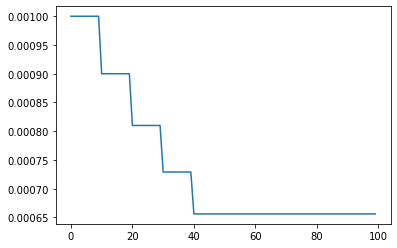

In [6]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 60 % drop

In [7]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 1
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'greedy',k=0.65)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified
num_pruned 23
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49, 58, 60, 42, 22, 13, 8, 33, 23, 63, 14]
num_pruned 23
indices_pruned !!!  [11, 55, 48, 13, 0, 7, 44, 53, 21, 23, 1, 50, 2, 39, 19, 28, 18, 16, 24, 31, 3, 22, 42]
num_pruned 45
indices_pruned !!!  [1, 116, 73, 7, 127, 74, 101, 23, 99, 105, 97, 84, 100, 57, 75, 47, 56, 69, 33, 42, 109, 71, 25, 113, 32, 120, 12, 62, 59, 103, 10, 22, 16, 9, 65, 14, 3, 4, 79, 60, 38, 18, 61, 40, 85]
num_pruned 45
indices_pruned !!!  [113, 33, 1, 125, 27, 88, 81, 82, 43, 15, 8, 101, 73, 53, 118, 0, 97, 32, 122, 89, 93, 92, 13, 110, 6, 90, 28, 98, 126, 83, 75, 117, 54, 115, 78, 52, 56, 66, 107, 114, 44, 31, 20, 67, 23]
num_pruned 90
indices_pruned !!!  [137, 122, 18, 201, 221, 187, 166, 2, 176, 199, 142, 78, 110, 54, 89, 101, 6, 220, 151, 224, 180, 83, 66, 154, 86, 205, 191, 13, 4, 225, 97, 198, 26, 183, 49, 44, 12, 238, 115, 178, 244, 175, 69, 50, 241, 145, 21, 111, 99, 169, 131, 90, 51

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.0107144016743925	Top1 Acc: 0.25378000001907347


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.3583946741079984	Top1 Acc: 0.4115


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.748442993749438	Top1 Acc: 0.5118799999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.284662975540644	Top1 Acc: 0.5213


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.8553447403261423	Top1 Acc: 0.6167200000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.7264111253279675	Top1 Acc: 0.5888


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.3954238480009387	Top1 Acc: 0.67232


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.499371276626104	Top1 Acc: 0.6155


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.1551917873685011	Top1 Acc: 0.70916


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.4080300497103342	Top1 Acc: 0.6323


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.0242742641502633	Top1 Acc: 0.727980000038147


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.360007436215123	Top1 Acc: 0.6401


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.9244941486726941	Top1 Acc: 0.7480999999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3340024751952932	Top1 Acc: 0.6482


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.8580676423924049	Top1 Acc: 0.7618400000572204


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.31384491165982	Top1 Acc: 0.6542


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.7944728206185734	Top1 Acc: 0.7781000000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3084134542489354	Top1 Acc: 0.6607


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.7428170060715102	Top1 Acc: 0.7891800000381469


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3085278913944582	Top1 Acc: 0.6624


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.6947670439472589	Top1 Acc: 0.8020200000572204


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.301313475717472	Top1 Acc: 0.6635


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.6669994227569122	Top1 Acc: 0.8094199999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.308662859699394	Top1 Acc: 0.6663


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.6441162163796632	Top1 Acc: 0.8154000000572205


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.324014369445511	Top1 Acc: 0.6642


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.6074594956682161	Top1 Acc: 0.8266200000190734


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3249029336096365	Top1 Acc: 0.6646


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.5720743877656015	Top1 Acc: 0.8342800000190734


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.3282552776457388	Top1 Acc: 0.6685


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.546322055027613	Top1 Acc: 0.8408599999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3268476045584376	Top1 Acc: 0.6706


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.5336978060510152	Top1 Acc: 0.8464000000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.331897492650189	Top1 Acc: 0.6728


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.5096954131675193	Top1 Acc: 0.8501800000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3430778142772144	Top1 Acc: 0.6718


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.4954230495730934	Top1 Acc: 0.8549999999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.359619742707361	Top1 Acc: 0.6707


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.47080218292715603	Top1 Acc: 0.861720000038147


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3645071077950393	Top1 Acc: 0.6733


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.44421766606895513	Top1 Acc: 0.86858


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3648475250111352	Top1 Acc: 0.6715


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.4234936737343478	Top1 Acc: 0.8745200000572204


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3644822149337092	Top1 Acc: 0.675


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.412784113336707	Top1 Acc: 0.8784200000572204


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.383609081370921	Top1 Acc: 0.6734


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.4056350339556594	Top1 Acc: 0.8800999999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.3806131210508226	Top1 Acc: 0.6762


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.3896802802906012	Top1 Acc: 0.8848600000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.3835878583449353	Top1 Acc: 0.6776


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.37700036175720525	Top1 Acc: 0.8875200000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.3980487441714806	Top1 Acc: 0.6758


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.36292601816946896	Top1 Acc: 0.8912200000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4056682760202432	Top1 Acc: 0.6763


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.3562924978525742	Top1 Acc: 0.89208


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.417284832725042	Top1 Acc: 0.6747


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.3472169843095038	Top1 Acc: 0.896400000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4250860802734955	Top1 Acc: 0.6734


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.3398533848392994	Top1 Acc: 0.8983200000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4166052590442608	Top1 Acc: 0.6765


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.3220965952786338	Top1 Acc: 0.9024


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.440251705012744	Top1 Acc: 0.6732


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.3109311102448827	Top1 Acc: 0.908


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4377982918220231	Top1 Acc: 0.6781


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.30226117206732633	Top1 Acc: 0.909360000038147


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.449212904972366	Top1 Acc: 0.6793


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.2899550551267536	Top1 Acc: 0.9131599999809266


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.456596233422243	Top1 Acc: 0.673


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.2791567311986633	Top1 Acc: 0.916160000038147


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4426324669318864	Top1 Acc: 0.6781


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.2823595799448545	Top1 Acc: 0.9150200000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.449657298341582	Top1 Acc: 0.6754


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.27526460679443293	Top1 Acc: 0.9175800000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4594653082799307	Top1 Acc: 0.6776


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.26528830325130914	Top1 Acc: 0.920880000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4701163225536105	Top1 Acc: 0.677


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.26457323265426297	Top1 Acc: 0.919900000038147


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4879028344456153	Top1 Acc: 0.6759


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.25423457383957054	Top1 Acc: 0.923720000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.475910272779344	Top1 Acc: 0.6822


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.2466738831318553	Top1 Acc: 0.9256000000572204


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4816670493234563	Top1 Acc: 0.6778


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.23616283663246027	Top1 Acc: 0.9287200000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4950533215003678	Top1 Acc: 0.6804


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.23258069546326346	Top1 Acc: 0.9305400000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.491903768310064	Top1 Acc: 0.681


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.2288087385389811	Top1 Acc: 0.930420000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.4980777803855607	Top1 Acc: 0.6789


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.2193331527321235	Top1 Acc: 0.93296


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.508597710464574	Top1 Acc: 0.6826


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.21830210924301002	Top1 Acc: 0.9331200000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5090216684945021	Top1 Acc: 0.6816


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.2072607023103158	Top1 Acc: 0.938360000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.521549629259713	Top1 Acc: 0.6811


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.20431828893282833	Top1 Acc: 0.9387000000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5124136473559127	Top1 Acc: 0.6818


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.20010898595728227	Top1 Acc: 0.9401599999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.537203450746174	Top1 Acc: 0.6782


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.2002100249195038	Top1 Acc: 0.9391199999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5303631915321834	Top1 Acc: 0.6806


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.19662573691600424	Top1 Acc: 0.94136


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5203782968883273	Top1 Acc: 0.6819


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.1872583199816439	Top1 Acc: 0.9433800000381469


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.54133873951586	Top1 Acc: 0.6772


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.19491281430892018	Top1 Acc: 0.94052


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5432280664202533	Top1 Acc: 0.6759


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.18830987079369138	Top1 Acc: 0.94272


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5523518927489655	Top1 Acc: 0.678


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.1830698752685276	Top1 Acc: 0.9457399999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.55249088323569	Top1 Acc: 0.6813


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.1766367445478354	Top1 Acc: 0.9464200000190734


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5446390290803547	Top1 Acc: 0.6802


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.1735308145927956	Top1 Acc: 0.948880000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5387123838255676	Top1 Acc: 0.6851


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.17106712101708593	Top1 Acc: 0.94848


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5421256219284445	Top1 Acc: 0.6862


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.16641352993562397	Top1 Acc: 0.949460000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5560644231265104	Top1 Acc: 0.6819


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.16788376887779102	Top1 Acc: 0.95036


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.554912974562826	Top1 Acc: 0.6812


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.16408512091545194	Top1 Acc: 0.949760000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5679532470582407	Top1 Acc: 0.6878


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.16116106198609942	Top1 Acc: 0.9519800000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5717147377472889	Top1 Acc: 0.6857


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.15726057239010205	Top1 Acc: 0.952760000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5753804279279104	Top1 Acc: 0.6801


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.1575148502731567	Top1 Acc: 0.9520199999809266


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.586012632031984	Top1 Acc: 0.6835


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.15745318023597493	Top1 Acc: 0.9525399999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5740419988390766	Top1 Acc: 0.6837


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.14899698548647752	Top1 Acc: 0.95494


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.57136217853691	Top1 Acc: 0.6853


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.14962635217877604	Top1 Acc: 0.9547800000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5866775618323796	Top1 Acc: 0.6843


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.14623308868702414	Top1 Acc: 0.955340000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5914050634903243	Top1 Acc: 0.6811


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.13973735147120092	Top1 Acc: 0.9589200000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5925218613841865	Top1 Acc: 0.6801


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.1409184264157282	Top1 Acc: 0.9580600000190734


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5843299506585808	Top1 Acc: 0.6857


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.1412004080822553	Top1 Acc: 0.9564400000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.595262141167363	Top1 Acc: 0.6794


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.1394252188294135	Top1 Acc: 0.9586399999809265


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5859309072735943	Top1 Acc: 0.6821


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.13656852636343378	Top1 Acc: 0.9596199999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5833678773686857	Top1 Acc: 0.6839


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.13389629433336464	Top1 Acc: 0.9594800000381469


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5994717788092698	Top1 Acc: 0.6792


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.13185919087637415	Top1 Acc: 0.9603599999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6045789356473126	Top1 Acc: 0.6823


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.1285572339020803	Top1 Acc: 0.9616600000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5985888936851598	Top1 Acc: 0.682


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.1318125108356976	Top1 Acc: 0.96056


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6024301399158527	Top1 Acc: 0.6839


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.13020424866844016	Top1 Acc: 0.9607799999809266


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5891605238371258	Top1 Acc: 0.6855


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.12487111249676598	Top1 Acc: 0.9635399999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6052968705756754	Top1 Acc: 0.6796


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.12447030146789673	Top1 Acc: 0.96196


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5957261686083637	Top1 Acc: 0.6868


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.12293992877540076	Top1 Acc: 0.9633800000572205


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6279100858712499	Top1 Acc: 0.6764


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.1194033548950463	Top1 Acc: 0.96414


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.63552922689462	Top1 Acc: 0.6771


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.11775225085561233	Top1 Acc: 0.9646999999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.626780140249035	Top1 Acc: 0.6794


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.1145577913488421	Top1 Acc: 0.9662400000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.621550076369998	Top1 Acc: 0.6799


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.11648407668027731	Top1 Acc: 0.964300000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6110793940628632	Top1 Acc: 0.6858


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.11135759101728039	Top1 Acc: 0.9668400000190734


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6285043275808986	Top1 Acc: 0.6807


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.11202135168568557	Top1 Acc: 0.9667800000572204


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6262071781520602	Top1 Acc: 0.6847


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11121773783622495	Top1 Acc: 0.9678799999809266


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6265912599201444	Top1 Acc: 0.6816


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10574224799909555	Top1 Acc: 0.9685400000572204


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6424339994599548	Top1 Acc: 0.6809


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.10620206919358209	Top1 Acc: 0.9680599999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6334996766681913	Top1 Acc: 0.6816


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.10681175048965627	Top1 Acc: 0.9679000000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6407070914401283	Top1 Acc: 0.6795


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10311469980670362	Top1 Acc: 0.9702200000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6339047075826911	Top1 Acc: 0.6815


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10217482395603529	Top1 Acc: 0.9697000000572205


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6432478292078911	Top1 Acc: 0.6822


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.10204186165214651	Top1 Acc: 0.9697600000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6456596021410785	Top1 Acc: 0.6849


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.10362632793691152	Top1 Acc: 0.9695200000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6315605564962459	Top1 Acc: 0.6819


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.09839429617252039	Top1 Acc: 0.97098


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6602834055695352	Top1 Acc: 0.6795


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.09850032956761015	Top1 Acc: 0.9707199999809265


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6299947168253646	Top1 Acc: 0.6863


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.0998022266046699	Top1 Acc: 0.96948


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.635693842851663	Top1 Acc: 0.6852


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.10176726081468107	Top1 Acc: 0.9699600000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6370525933519195	Top1 Acc: 0.6832


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.09615633410432607	Top1 Acc: 0.971560000038147


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 84.38it/s]


Validation results at epoch-99 | loss: 1.644821601577952	Top1 Acc: 0.6823
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.Co

num_pruned 180
indices_pruned !!!  [168, 398, 493, 467, 154, 217, 56, 155, 218, 350, 384, 178, 412, 503, 82, 146, 343, 79, 26, 287, 441, 421, 68, 184, 67, 99, 19, 349, 302, 73, 487, 469, 91, 21, 422, 166, 215, 22, 504, 400, 55, 206, 455, 100, 65, 305, 357, 334, 1, 173, 75, 360, 280, 483, 498, 143, 85, 207, 160, 135, 511, 292, 181, 147, 144, 175, 394, 495, 260, 454, 458, 457, 105, 37, 475, 219, 297, 425, 2, 427, 33, 269, 404, 244, 122, 98, 399, 246, 300, 8, 252, 157, 5, 285, 461, 48, 245, 315, 18, 6, 192, 410, 4, 121, 77, 104, 119, 387, 38, 347, 321, 191, 368, 369, 353, 411, 241, 447, 502, 301, 63, 141, 408, 492, 11, 335, 142, 477, 256, 375, 60, 284, 76, 114, 115, 320, 293, 431, 32, 309, 470, 90, 39, 88, 490, 148, 342, 423, 443, 286, 414, 174, 336, 96, 424, 230, 505, 476, 3, 208, 131, 239, 182, 150, 419, 388, 480, 202, 25, 415, 391, 222, 430, 450, 138, 224, 348, 268, 460, 23]
num_pruned 180
indices_pruned !!!  [403, 136, 185, 113, 462, 43, 38, 44, 71, 65, 206, 470, 161, 337, 196, 182, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.015252364565955	Top1 Acc: 0.26646000000953673


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.351047733162023	Top1 Acc: 0.4132


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.7525544337299475	Top1 Acc: 0.5046599999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.3117538947093337	Top1 Acc: 0.5182


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.8966561610741384	Top1 Acc: 0.6016000000190734


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.7861967267869394	Top1 Acc: 0.5788


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.441079496727575	Top1 Acc: 0.6597399999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.5449143693416933	Top1 Acc: 0.607


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.190644483584577	Top1 Acc: 0.6993800000572205


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.4324828099600877	Top1 Acc: 0.6262


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.037363920065448	Top1 Acc: 0.7277800000572204


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.383627938318856	Top1 Acc: 0.6362


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.9337260718540767	Top1 Acc: 0.74684


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3419964902008636	Top1 Acc: 0.6452


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.8586177848793967	Top1 Acc: 0.7641200000572205


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3414926891085468	Top1 Acc: 0.6458


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.8039960448089463	Top1 Acc: 0.7773999999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3231356770177432	Top1 Acc: 0.6555


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.7449352231324481	Top1 Acc: 0.7884200000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3140343405023407	Top1 Acc: 0.6601


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.6972033413474822	Top1 Acc: 0.8019800000572205


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3229568578019928	Top1 Acc: 0.6605


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.6640263627404752	Top1 Acc: 0.8099799999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.320976811873762	Top1 Acc: 0.662


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.6275814037646175	Top1 Acc: 0.8207599999809265


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3170983836620669	Top1 Acc: 0.6636


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.6091643030686147	Top1 Acc: 0.8240399999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3078527880620352	Top1 Acc: 0.6689


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.5742620923330107	Top1 Acc: 0.8330200000572204


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.3177889676033696	Top1 Acc: 0.6698


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.5498045918429294	Top1 Acc: 0.8409599999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3227003850514376	Top1 Acc: 0.671


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.5280329249703976	Top1 Acc: 0.8460400000381469


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3297300602816329	Top1 Acc: 0.6714


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.5078373755640386	Top1 Acc: 0.8512800000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3241027940677692	Top1 Acc: 0.6722


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.4835486880043888	Top1 Acc: 0.8590599999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.347196846823149	Top1 Acc: 0.6762


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.46449620545367754	Top1 Acc: 0.8631400000572205


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.361482322970523	Top1 Acc: 0.6734


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.4491749303343961	Top1 Acc: 0.86732


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3556195731404461	Top1 Acc: 0.6773


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.43202326296235594	Top1 Acc: 0.87122


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.365661695033689	Top1 Acc: 0.6755


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.41692911179931574	Top1 Acc: 0.876400000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3674360596680943	Top1 Acc: 0.6759


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.39924670020332725	Top1 Acc: 0.8806999999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.3696118215971356	Top1 Acc: 0.675


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.3802679376224118	Top1 Acc: 0.88598


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.3913350090195862	Top1 Acc: 0.674


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.37343285890186534	Top1 Acc: 0.88836


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4025501918189134	Top1 Acc: 0.6748


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.36161086374841384	Top1 Acc: 0.8920400000572205


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4004833788811406	Top1 Acc: 0.6773


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.3561054412894847	Top1 Acc: 0.8927600000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4118651423273207	Top1 Acc: 0.6719


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.3433056849881511	Top1 Acc: 0.8956399999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.415973904766614	Top1 Acc: 0.6767


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.3327176908169256	Top1 Acc: 0.9011599999809266


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4284461042549037	Top1 Acc: 0.6763


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.3178884253248839	Top1 Acc: 0.9052400000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4249058705341966	Top1 Acc: 0.6788


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.3067652618564913	Top1 Acc: 0.9075800000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.435193718234195	Top1 Acc: 0.6791


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.30516351953796717	Top1 Acc: 0.9084799999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4366804972479614	Top1 Acc: 0.6793


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.2881798908457427	Top1 Acc: 0.91322


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4500165408170675	Top1 Acc: 0.6784


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.2839176782485469	Top1 Acc: 0.9129


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.455638185332093	Top1 Acc: 0.6776


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.27748538511793325	Top1 Acc: 0.91558


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4515680723552462	Top1 Acc: 0.6763


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.26689408687145816	Top1 Acc: 0.91942


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4579710884939265	Top1 Acc: 0.6774


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.2591962214473568	Top1 Acc: 0.9222199999809265


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4439601505858988	Top1 Acc: 0.6824


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.25416751322157854	Top1 Acc: 0.9228800000572205


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4693895427486565	Top1 Acc: 0.6794


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.2514977312034658	Top1 Acc: 0.92392


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4835856790784039	Top1 Acc: 0.675


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.24078977458617268	Top1 Acc: 0.92822


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4930564451821242	Top1 Acc: 0.6788


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.22958512194549946	Top1 Acc: 0.9312400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.485073048857194	Top1 Acc: 0.6825


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.22827099198880402	Top1 Acc: 0.9296600000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4945166639134855	Top1 Acc: 0.677


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.21851878439831307	Top1 Acc: 0.9340600000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.49345700197582	Top1 Acc: 0.6787


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.21611662167112541	Top1 Acc: 0.93502


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5022120279601858	Top1 Acc: 0.6791


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.21691154740045748	Top1 Acc: 0.9340400000572204


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5176721932012824	Top1 Acc: 0.6776


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.20534814623615627	Top1 Acc: 0.9380800000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.505164644386195	Top1 Acc: 0.6774


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.20103805475984998	Top1 Acc: 0.9392000000190734


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5142111582092093	Top1 Acc: 0.6792


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.2004583577632599	Top1 Acc: 0.9392799999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5200624073608011	Top1 Acc: 0.6807


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.19976977680040442	Top1 Acc: 0.9396200000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.526705394817304	Top1 Acc: 0.6793


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.1886685265185278	Top1 Acc: 0.94306


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5403120970424218	Top1 Acc: 0.6799


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.19024897303880023	Top1 Acc: 0.9430800000190734


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5448936254163332	Top1 Acc: 0.677


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.18508493768818238	Top1 Acc: 0.9438600000190734


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5388684016239793	Top1 Acc: 0.6804


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.1856694110404805	Top1 Acc: 0.9436400000572205


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5493698625624934	Top1 Acc: 0.6788


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.17820748722995333	Top1 Acc: 0.9462999999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5546769130079052	Top1 Acc: 0.6807


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.17243030184255842	Top1 Acc: 0.9487199999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5549759683729727	Top1 Acc: 0.6782


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.1756887793674341	Top1 Acc: 0.9468800000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5372426932371115	Top1 Acc: 0.6807


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.17351735974935925	Top1 Acc: 0.9481399999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.568728584277479	Top1 Acc: 0.6806


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.16576091939454798	Top1 Acc: 0.94968


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5486771004109443	Top1 Acc: 0.6844


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.16158028303281122	Top1 Acc: 0.9511800000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5559268103370183	Top1 Acc: 0.6846


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.16131080327855657	Top1 Acc: 0.9520600000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5625710592994206	Top1 Acc: 0.6844


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.15413648251186857	Top1 Acc: 0.9540400000572204


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5690038732335538	Top1 Acc: 0.6796


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.15676222656808242	Top1 Acc: 0.9525199999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5816119501862345	Top1 Acc: 0.6786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.14896072140511343	Top1 Acc: 0.9556200000190734


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.575609010986135	Top1 Acc: 0.6797


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.150483191584992	Top1 Acc: 0.9546799999809266


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5791835437847088	Top1 Acc: 0.6828


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.15153179176704354	Top1 Acc: 0.9544200000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5966716491723363	Top1 Acc: 0.678


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.1467281887807962	Top1 Acc: 0.9564400000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5789380224445198	Top1 Acc: 0.6788


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.14537748225662103	Top1 Acc: 0.9560199999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5836448624164243	Top1 Acc: 0.6824


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.14012934387568624	Top1 Acc: 0.9578200000572205


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.585407174086269	Top1 Acc: 0.6802


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.14269920521418153	Top1 Acc: 0.9575000000572205


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6199369747427446	Top1 Acc: 0.6756


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.1369401894871841	Top1 Acc: 0.9592800000190734


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5882279420200782	Top1 Acc: 0.6797


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.13848913666766013	Top1 Acc: 0.95786


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6166687736028358	Top1 Acc: 0.6797


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.13337320943012873	Top1 Acc: 0.9596600000572204


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6044737990898421	Top1 Acc: 0.6795


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.1299421025435333	Top1 Acc: 0.9615600000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.617932781388488	Top1 Acc: 0.6794


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.1344598891485073	Top1 Acc: 0.9591400000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6062840087504326	Top1 Acc: 0.6814


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.1358069776107207	Top1 Acc: 0.958460000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6088688584822644	Top1 Acc: 0.6796


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.12516809444483892	Top1 Acc: 0.9633400000572204


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6087377493894552	Top1 Acc: 0.6765


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.12154145963261347	Top1 Acc: 0.9638199999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.60384919371786	Top1 Acc: 0.6769


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.1239995482470602	Top1 Acc: 0.9636400000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.617010136193867	Top1 Acc: 0.6833


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.1176978129217082	Top1 Acc: 0.9649799999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6218195338792438	Top1 Acc: 0.681


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.11823944791751292	Top1 Acc: 0.9641800000190734


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6218883779984485	Top1 Acc: 0.6762


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.11810747730305128	Top1 Acc: 0.964440000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.615088390398629	Top1 Acc: 0.6825


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.12007215681016598	Top1 Acc: 0.9644200000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.62119313885894	Top1 Acc: 0.6793


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.11495511880730425	Top1 Acc: 0.9663400000572204


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6251491489289682	Top1 Acc: 0.6798


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.11147635110923092	Top1 Acc: 0.9660400000381469


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6330773196642911	Top1 Acc: 0.681


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.11333865664251473	Top1 Acc: 0.9657800000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.623443816281572	Top1 Acc: 0.6818


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.10995740536838541	Top1 Acc: 0.967000000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6424409724489044	Top1 Acc: 0.6797


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11072672196113698	Top1 Acc: 0.9667799999809266


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6423231680181962	Top1 Acc: 0.6812


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10803422432802522	Top1 Acc: 0.9681400000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6407643571684631	Top1 Acc: 0.682


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.10608335175668188	Top1 Acc: 0.9680799999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6644634913794603	Top1 Acc: 0.6773


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.1098764028181048	Top1 Acc: 0.9673800000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6351858981048004	Top1 Acc: 0.683


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10193926004021217	Top1 Acc: 0.9705800000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6404850241504139	Top1 Acc: 0.6806


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10350732104686063	Top1 Acc: 0.9691600000190734


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6359373512147348	Top1 Acc: 0.6803


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.0989612140561766	Top1 Acc: 0.96948


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6603373500365246	Top1 Acc: 0.6805


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.09846333145161572	Top1 Acc: 0.971380000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6758608999131601	Top1 Acc: 0.6762


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.10148784570167284	Top1 Acc: 0.970160000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6473927316786368	Top1 Acc: 0.6789


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.09689566912724996	Top1 Acc: 0.9714400000572204


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6660722177239913	Top1 Acc: 0.6758


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.10176048366843587	Top1 Acc: 0.9697


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6636809834951087	Top1 Acc: 0.678


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.09478234799812212	Top1 Acc: 0.9719200000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6565701704991014	Top1 Acc: 0.6796


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.09309403840785899	Top1 Acc: 0.9725199999809265


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 78.08it/s]


Validation results at epoch-99 | loss: 1.6667330551751052	Top1 Acc: 0.682
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.Co

num_pruned 180
indices_pruned !!!  [168, 280, 467, 154, 67, 56, 178, 218, 503, 398, 384, 421, 155, 412, 98, 343, 320, 245, 217, 244, 26, 100, 477, 498, 184, 29, 173, 441, 350, 427, 305, 135, 483, 82, 19, 284, 175, 242, 300, 292, 454, 353, 109, 174, 112, 33, 76, 269, 166, 302, 362, 493, 469, 192, 414, 104, 58, 285, 39, 96, 131, 475, 206, 205, 470, 22, 379, 79, 110, 357, 461, 38, 160, 6, 424, 147, 443, 191, 458, 119, 231, 455, 425, 215, 306, 138, 60, 323, 399, 132, 428, 2, 321, 259, 1, 163, 422, 256, 400, 348, 102, 468, 369, 145, 115, 181, 121, 88, 504, 77, 431, 150, 55, 65, 27, 510, 478, 241, 394, 287, 91, 496, 4, 176, 293, 108, 63, 182, 480, 408, 237, 492, 200, 114, 252, 403, 122, 260, 99, 341, 3, 331, 442, 157, 310, 8, 5, 344, 141, 226, 202, 18, 46, 117, 228, 75, 466, 385, 126, 106, 334, 80, 495, 294, 140, 48, 460, 143, 415, 447, 462, 368, 457, 210, 199, 347, 322, 85, 297, 142]
num_pruned 180
indices_pruned !!!  [403, 462, 185, 38, 206, 43, 44, 113, 136, 182, 65, 196, 202, 71, 106, 41

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.006622187621758	Top1 Acc: 0.2849000000286102


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.3254191664200796	Top1 Acc: 0.4271


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.7257462035664513	Top1 Acc: 0.5176200000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.28983182243154	Top1 Acc: 0.525


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.8531861582680431	Top1 Acc: 0.61546


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.741399395314953	Top1 Acc: 0.5845


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.384838052417921	Top1 Acc: 0.677140000038147


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.527211086659492	Top1 Acc: 0.6103


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.1504565282246035	Top1 Acc: 0.708900000038147


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.4229488357712952	Top1 Acc: 0.6257


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.0125906830248625	Top1 Acc: 0.7335199999809265


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.367072902148283	Top1 Acc: 0.6389


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.9082508257892735	Top1 Acc: 0.754740000038147


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3481933934779107	Top1 Acc: 0.6438


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.8427976534494659	Top1 Acc: 0.7674400000381469


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3275713505624216	Top1 Acc: 0.6495


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.7868514403967601	Top1 Acc: 0.781460000038147


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3209065681771388	Top1 Acc: 0.6588


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.732426215925485	Top1 Acc: 0.7929400000572204


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3130020876474018	Top1 Acc: 0.6589


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.6912507020756412	Top1 Acc: 0.8027000000572204


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.30539714912825	Top1 Acc: 0.6638


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.650521938453245	Top1 Acc: 0.81476


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.316625174087814	Top1 Acc: 0.6647


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.6197962601623876	Top1 Acc: 0.8203199999809265


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3275776633733436	Top1 Acc: 0.665


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.5928702626539313	Top1 Acc: 0.8289399999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3368205850637411	Top1 Acc: 0.6646


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.5672341076004536	Top1 Acc: 0.8354200000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.331485865991327	Top1 Acc: 0.6669


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.5395561000117866	Top1 Acc: 0.842280000038147


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3280485325221774	Top1 Acc: 0.6687


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.5174594734940687	Top1 Acc: 0.8487600000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3403168977061404	Top1 Acc: 0.672


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.5021312638469364	Top1 Acc: 0.85308


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3466551696197897	Top1 Acc: 0.6692


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.4770886757032341	Top1 Acc: 0.858700000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.3485396036618873	Top1 Acc: 0.6735


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.4649430815978428	Top1 Acc: 0.8618799999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3758595118039771	Top1 Acc: 0.6706


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.4393786850868893	Top1 Acc: 0.8714599999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3597721676283245	Top1 Acc: 0.6763


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.41906338388962516	Top1 Acc: 0.8756400000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3692979148671598	Top1 Acc: 0.6773


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.41007006865785556	Top1 Acc: 0.8790199999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3776365382761895	Top1 Acc: 0.6766


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.3888994711058219	Top1 Acc: 0.8838399999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.377366299870648	Top1 Acc: 0.674


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.3882532727992748	Top1 Acc: 0.8834800000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.3977784612510777	Top1 Acc: 0.6714


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.3716567075999497	Top1 Acc: 0.8897999999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.403485274767574	Top1 Acc: 0.676


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.3519486049023431	Top1 Acc: 0.8941800000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.403188986868798	Top1 Acc: 0.6768


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.3518022436391362	Top1 Acc: 0.8949400000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4262813706941242	Top1 Acc: 0.6765


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.3425643336208885	Top1 Acc: 0.89772


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4280902192562441	Top1 Acc: 0.6748


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.3280248563079273	Top1 Acc: 0.90318


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4225079485132723	Top1 Acc: 0.6766


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.3179102154720165	Top1 Acc: 0.90364


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.429281849649888	Top1 Acc: 0.6774


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.30390078099944706	Top1 Acc: 0.909360000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4388025516196141	Top1 Acc: 0.6779


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.2947358474173509	Top1 Acc: 0.9121599999809266


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4446536642086656	Top1 Acc: 0.6759


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.2903310050211294	Top1 Acc: 0.91254


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4416168422638616	Top1 Acc: 0.6805


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.2818857871967813	Top1 Acc: 0.91522


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4424832636796976	Top1 Acc: 0.6787


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.2710367456230971	Top1 Acc: 0.9193999999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4519702882706365	Top1 Acc: 0.6788


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.27236974044986395	Top1 Acc: 0.9180200000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4893671417538124	Top1 Acc: 0.6728


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.26022297031510516	Top1 Acc: 0.92286


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4728528019748157	Top1 Acc: 0.6759


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.25479022200074036	Top1 Acc: 0.9236200000381469


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4781585705431202	Top1 Acc: 0.6762


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.25025722702674547	Top1 Acc: 0.9246


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4945695822751974	Top1 Acc: 0.6762


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.23625223016571206	Top1 Acc: 0.9282599999809266


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.492598896539664	Top1 Acc: 0.6777


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.23479473895733924	Top1 Acc: 0.9296200000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4943493234960339	Top1 Acc: 0.6774


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.22505634714422934	Top1 Acc: 0.932300000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5199990921382662	Top1 Acc: 0.6758


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.2216772637556276	Top1 Acc: 0.9333399999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5044238793699047	Top1 Acc: 0.6762


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.21824529521224445	Top1 Acc: 0.934600000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5159679779523536	Top1 Acc: 0.677


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.2155931508906967	Top1 Acc: 0.935220000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5238956062099602	Top1 Acc: 0.6759


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.20750889708014095	Top1 Acc: 0.9373200000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5189839427984213	Top1 Acc: 0.6768


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.20791146618402218	Top1 Acc: 0.93738


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5284213438818726	Top1 Acc: 0.6761


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.19673742369160324	Top1 Acc: 0.9407000000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.52646012472201	Top1 Acc: 0.6778


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.1972691569563068	Top1 Acc: 0.9406600000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.533162426344956	Top1 Acc: 0.6819


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.19112765804276138	Top1 Acc: 0.942400000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5375774917723257	Top1 Acc: 0.6769


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.1887284651817873	Top1 Acc: 0.9425599999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5344894241683091	Top1 Acc: 0.6782


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.18317773921029343	Top1 Acc: 0.9454000000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5472688418400438	Top1 Acc: 0.6779


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.18226910283422226	Top1 Acc: 0.9445000000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.543379545211792	Top1 Acc: 0.6798


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.17465791747431317	Top1 Acc: 0.94752


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.551874067209944	Top1 Acc: 0.6776


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.1736389502425633	Top1 Acc: 0.9503


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5658836191213583	Top1 Acc: 0.6781


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.1715351852786053	Top1 Acc: 0.9482600000572204


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5475576429427425	Top1 Acc: 0.6852


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.17120137138058766	Top1 Acc: 0.9492800000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5797245857081836	Top1 Acc: 0.6748


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.1628679000412869	Top1 Acc: 0.95126


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.553722944440721	Top1 Acc: 0.679


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.15900554640404405	Top1 Acc: 0.9517000000572204


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5808942302872864	Top1 Acc: 0.6798


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.1590121894255471	Top1 Acc: 0.9513999999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5544181413288358	Top1 Acc: 0.6818


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.1577806058518417	Top1 Acc: 0.9522600000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5720783773856828	Top1 Acc: 0.6832


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.1518787472220638	Top1 Acc: 0.9549400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5711222894584076	Top1 Acc: 0.6765


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.1523092438745529	Top1 Acc: 0.95406


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.576947258243078	Top1 Acc: 0.6782


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.14997499988740667	Top1 Acc: 0.9550399999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5935757650604732	Top1 Acc: 0.6804


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.1487247519900122	Top1 Acc: 0.9547799999809266


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5809736357459538	Top1 Acc: 0.6777


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.1481662189678463	Top1 Acc: 0.9560600000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5842453414880777	Top1 Acc: 0.6834


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.14705741255903793	Top1 Acc: 0.9554399999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.594851843918426	Top1 Acc: 0.6802


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.13966527719365057	Top1 Acc: 0.9571199999809266


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6024179232271412	Top1 Acc: 0.6803


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.13903415543229683	Top1 Acc: 0.9582600000572205


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6226206550115272	Top1 Acc: 0.6811


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.1389908300584082	Top1 Acc: 0.95896


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6064616147475907	Top1 Acc: 0.6795


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.13727766326854907	Top1 Acc: 0.9594


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6024940474123894	Top1 Acc: 0.6837


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.13546208671444213	Top1 Acc: 0.9595399999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5907179577441155	Top1 Acc: 0.6822


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.12893692724159	Top1 Acc: 0.9616000000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6110860848728614	Top1 Acc: 0.6809


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.13178115579135277	Top1 Acc: 0.9609200000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6250651584395879	Top1 Acc: 0.6792


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.12827629064355056	Top1 Acc: 0.9611199999809266


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6105100074900855	Top1 Acc: 0.6825


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.12620547248998568	Top1 Acc: 0.9620600000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6093701297723795	Top1 Acc: 0.6793


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.1267162613151476	Top1 Acc: 0.961460000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6211626544783386	Top1 Acc: 0.6801


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.12671631695631216	Top1 Acc: 0.9618799999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6261854669715785	Top1 Acc: 0.6787


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.12212791764522757	Top1 Acc: 0.9638400000190734


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6109993880308127	Top1 Acc: 0.6779


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.11831826748102522	Top1 Acc: 0.964460000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6351146788536748	Top1 Acc: 0.6803


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.11400582447000172	Top1 Acc: 0.9662000000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6346172290512277	Top1 Acc: 0.6798


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.11839534263209918	Top1 Acc: 0.9643000000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6361946237238147	Top1 Acc: 0.6784


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.11138591333232878	Top1 Acc: 0.9669200000572205


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6342195287535461	Top1 Acc: 0.6815


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.11393657490572966	Top1 Acc: 0.9653400000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6214718592317798	Top1 Acc: 0.6811


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.10935300040770979	Top1 Acc: 0.9673999999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6314185737054558	Top1 Acc: 0.684


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.10993819676644509	Top1 Acc: 0.9676400000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.62525328805175	Top1 Acc: 0.6851


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11038098631479094	Top1 Acc: 0.9670400000381469


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6345419151873528	Top1 Acc: 0.6855


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1085705912774405	Top1 Acc: 0.9673800000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6561155153226248	Top1 Acc: 0.6801


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.1090990990028738	Top1 Acc: 0.967640000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6682924952688096	Top1 Acc: 0.6785


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.10128041278199314	Top1 Acc: 0.9695199999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.653362271151965	Top1 Acc: 0.6814


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10280980552782489	Top1 Acc: 0.97046


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.652855426450319	Top1 Acc: 0.6828


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10497093382184311	Top1 Acc: 0.968540000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6697255689886552	Top1 Acc: 0.6801


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.10411078971155617	Top1 Acc: 0.96876


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6464540686788438	Top1 Acc: 0.6848


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.10110824699501705	Top1 Acc: 0.9705799999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6788111321533783	Top1 Acc: 0.6793


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.09965604291680981	Top1 Acc: 0.9702399999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6522144637530363	Top1 Acc: 0.6846


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.09846331749845039	Top1 Acc: 0.9705000000572205


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6471177943145172	Top1 Acc: 0.6822


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.09683795680132364	Top1 Acc: 0.9712600000572205


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6706554180459132	Top1 Acc: 0.6831


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.09494777113828055	Top1 Acc: 0.971620000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.670648001417329	Top1 Acc: 0.6834


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.09775396658922247	Top1 Acc: 0.97114


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 76.15it/s]


Validation results at epoch-99 | loss: 1.6462290996237645	Top1 Acc: 0.6856
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

num_pruned 180
indices_pruned !!!  [154, 155, 56, 168, 503, 2, 350, 412, 67, 217, 244, 398, 215, 230, 493, 312, 75, 421, 178, 300, 173, 218, 400, 467, 305, 441, 343, 322, 68, 76, 200, 26, 284, 1, 321, 504, 33, 347, 22, 369, 498, 73, 147, 184, 207, 302, 38, 385, 242, 431, 324, 175, 144, 353, 252, 82, 511, 444, 181, 192, 237, 492, 166, 174, 99, 115, 182, 104, 39, 114, 105, 79, 469, 160, 261, 124, 210, 408, 108, 443, 119, 245, 384, 77, 368, 260, 191, 280, 306, 320, 208, 6, 55, 63, 241, 29, 475, 190, 404, 121, 269, 292, 135, 278, 318, 309, 58, 8, 96, 46, 285, 461, 268, 442, 490, 48, 429, 177, 410, 455, 45, 136, 416, 478, 122, 4, 425, 468, 88, 428, 267, 256, 422, 19, 65, 287, 325, 34, 399, 357, 375, 500, 226, 18, 466, 102, 484, 293, 394, 98, 335, 202, 132, 454, 176, 430, 142, 85, 157, 303, 403, 434, 216, 204, 255, 334, 141, 457, 143, 297, 362, 491, 462, 374, 206, 205, 246, 342, 294, 505]
num_pruned 180
indices_pruned !!!  [185, 38, 403, 43, 462, 65, 136, 113, 44, 206, 71, 481, 196, 398, 161

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.011768384967619	Top1 Acc: 0.26924000000953674


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.342226106909257	Top1 Acc: 0.4088


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.743619145029951	Top1 Acc: 0.50774


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.2932313122326815	Top1 Acc: 0.5215


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.8531411419744077	Top1 Acc: 0.6186199999809265


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.7321929629844954	Top1 Acc: 0.5889


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.3861902528406713	Top1 Acc: 0.675480000038147


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.4944476447527921	Top1 Acc: 0.6197


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.1469489342111456	Top1 Acc: 0.7103800000381469


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.4031589981875843	Top1 Acc: 0.635


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.0103185388743114	Top1 Acc: 0.73172


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.3464539820634867	Top1 Acc: 0.6459


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.914562687087242	Top1 Acc: 0.75286


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3295744853683664	Top1 Acc: 0.6507


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.8467558332721291	Top1 Acc: 0.76596


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3119500234157224	Top1 Acc: 0.6559


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.7924159768292361	Top1 Acc: 0.7792600000572205


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3068561206890057	Top1 Acc: 0.655


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.7396431326713708	Top1 Acc: 0.7895599999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3008042543749265	Top1 Acc: 0.6599


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.6960102152793913	Top1 Acc: 0.8012800000381469


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3066486701180664	Top1 Acc: 0.6669


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.6541589923069605	Top1 Acc: 0.8140600000381469


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.2969704006291642	Top1 Acc: 0.6669


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.6338989262843071	Top1 Acc: 0.8192799999809265


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3196583782570273	Top1 Acc: 0.6643


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.5972850730504526	Top1 Acc: 0.8268400000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.318846484528312	Top1 Acc: 0.6678


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.5714388092612976	Top1 Acc: 0.8330999999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.3301244340365446	Top1 Acc: 0.6653


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.5365735095785097	Top1 Acc: 0.84678


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3079910693289358	Top1 Acc: 0.6768


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.5278296304480804	Top1 Acc: 0.8449799999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3300213187555723	Top1 Acc: 0.672


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.49793884760278573	Top1 Acc: 0.8533800000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.321898154820068	Top1 Acc: 0.6755


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.4812134261936178	Top1 Acc: 0.858380000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.3485235307790056	Top1 Acc: 0.6737


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.46710857649898285	Top1 Acc: 0.8617999999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3461030925376505	Top1 Acc: 0.6759


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.4494824698361594	Top1 Acc: 0.8683600000190735


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3490864687328097	Top1 Acc: 0.6733


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.41991720975512437	Top1 Acc: 0.8761800000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3715405305729638	Top1 Acc: 0.6739


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.4113077804865435	Top1 Acc: 0.8787800000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3760316990598846	Top1 Acc: 0.6749


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.4012155341903877	Top1 Acc: 0.8813800000190735


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.3865541559231431	Top1 Acc: 0.6732


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.38882771199164184	Top1 Acc: 0.8852000000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.384963960587224	Top1 Acc: 0.6772


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.3693747686989167	Top1 Acc: 0.8894000000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.402165503441533	Top1 Acc: 0.6736


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.3717579495952562	Top1 Acc: 0.8879200000572205


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.397112964074823	Top1 Acc: 0.6742


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.3507136391556781	Top1 Acc: 0.8944400000381469


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.3938103061688096	Top1 Acc: 0.6785


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.33552058178293126	Top1 Acc: 0.899340000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4048265716697597	Top1 Acc: 0.6757


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.32873304493134586	Top1 Acc: 0.9024400000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4268507874464686	Top1 Acc: 0.6773


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.31722407961440513	Top1 Acc: 0.9046800000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4306751534908633	Top1 Acc: 0.6796


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.3037882932769063	Top1 Acc: 0.9082600000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4370395013048678	Top1 Acc: 0.6774


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.29789539039744745	Top1 Acc: 0.9122199999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4277269387546974	Top1 Acc: 0.6834


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.29231798690755656	Top1 Acc: 0.9131599999809266


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4519432028637658	Top1 Acc: 0.6743


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.281513444526726	Top1 Acc: 0.91558


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4537604534173314	Top1 Acc: 0.6804


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.2736737314049545	Top1 Acc: 0.91806


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4620581978484044	Top1 Acc: 0.6796


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.2687805271933756	Top1 Acc: 0.919780000038147


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4590935118590729	Top1 Acc: 0.6813


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.2597213810895715	Top1 Acc: 0.9225000000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.479893611201757	Top1 Acc: 0.6773


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.25962657647212145	Top1 Acc: 0.9220599999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4730919780610483	Top1 Acc: 0.681


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.2546084808647785	Top1 Acc: 0.9241600000572204


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4808397874047485	Top1 Acc: 0.6817


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.24022818762628015	Top1 Acc: 0.9288199999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4915759736978556	Top1 Acc: 0.6771


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.23520274485087456	Top1 Acc: 0.9281200000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4989587860771372	Top1 Acc: 0.6798


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.22847503330320348	Top1 Acc: 0.93106


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4920782665663128	Top1 Acc: 0.6777


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.2174600608780256	Top1 Acc: 0.9349600000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5016676413862011	Top1 Acc: 0.6817


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.21711514960698156	Top1 Acc: 0.935040000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5121344991877108	Top1 Acc: 0.6811


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.20860043017531904	Top1 Acc: 0.937420000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5203104894372481	Top1 Acc: 0.6789


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.20438206058633906	Top1 Acc: 0.9392800000381469


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5156767760651022	Top1 Acc: 0.6777


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.20645960346054848	Top1 Acc: 0.93972


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5059788053548788	Top1 Acc: 0.6778


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.20364456224586347	Top1 Acc: 0.93822


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5236418126504632	Top1 Acc: 0.6778


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.19709627867659643	Top1 Acc: 0.942020000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5178413194946097	Top1 Acc: 0.6824


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.19162988644617293	Top1 Acc: 0.9421000000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.527614119686658	Top1 Acc: 0.6831


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.18659218898057328	Top1 Acc: 0.9436799999809266


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5184477220607708	Top1 Acc: 0.6807


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.18619674691916122	Top1 Acc: 0.9438200000572204


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5434915114052687	Top1 Acc: 0.6778


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.1843605153929547	Top1 Acc: 0.9443599999809266


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5275085017650942	Top1 Acc: 0.6814


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.17577572268864994	Top1 Acc: 0.946220000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.546224394931069	Top1 Acc: 0.68


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.1751946583390236	Top1 Acc: 0.9468199999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5571177322653276	Top1 Acc: 0.6803


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.17087700310379952	Top1 Acc: 0.94828


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.553353038769734	Top1 Acc: 0.6778


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.1706671680102263	Top1 Acc: 0.9485999999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5724731668641296	Top1 Acc: 0.6742


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.16377661421971249	Top1 Acc: 0.950760000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.562395202962658	Top1 Acc: 0.6783


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.16214014451636377	Top1 Acc: 0.9518000000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5682096285156057	Top1 Acc: 0.6771


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.1576376279239612	Top1 Acc: 0.9508999999809266


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5791868288305742	Top1 Acc: 0.6815


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.15607538892675543	Top1 Acc: 0.9532600000381469


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5787128843838656	Top1 Acc: 0.677


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.15261301447820785	Top1 Acc: 0.9540800000190734


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5918417806866803	Top1 Acc: 0.6791


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.15208267481506937	Top1 Acc: 0.9546600000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5916039415552645	Top1 Acc: 0.6762


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.14805232921181738	Top1 Acc: 0.95556


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5871949648555321	Top1 Acc: 0.6802


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.14374447323362846	Top1 Acc: 0.9567000000572204


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5878809796103948	Top1 Acc: 0.6836


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.14434495021391403	Top1 Acc: 0.9563999999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5906157765207412	Top1 Acc: 0.681


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.1453067431955234	Top1 Acc: 0.9560399999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5891425775576242	Top1 Acc: 0.6824


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.1485963667197453	Top1 Acc: 0.95594


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.59224940704394	Top1 Acc: 0.683


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.1403098095713369	Top1 Acc: 0.957680000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6097869646700123	Top1 Acc: 0.6794


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.13605894518973272	Top1 Acc: 0.9595799999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.594651547413838	Top1 Acc: 0.6822


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.1301745595815389	Top1 Acc: 0.961980000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6121181385426582	Top1 Acc: 0.6841


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.13317788741015413	Top1 Acc: 0.960220000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.602967550482931	Top1 Acc: 0.6802


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.1276083897294291	Top1 Acc: 0.9618999999809266


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6211866668508024	Top1 Acc: 0.6804


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.1274770337545201	Top1 Acc: 0.96254


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6174198871926417	Top1 Acc: 0.6774


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.12998450710378645	Top1 Acc: 0.9598000000572204


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6064702476127237	Top1 Acc: 0.6817


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.1309107573002653	Top1 Acc: 0.95978


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6212602687787405	Top1 Acc: 0.6822


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.12303506553916217	Top1 Acc: 0.9640399999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6261237874815735	Top1 Acc: 0.6823


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.12208941583628849	Top1 Acc: 0.96278


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6258876897111725	Top1 Acc: 0.6787


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.12492048693701739	Top1 Acc: 0.9625399999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6166976237598853	Top1 Acc: 0.6831


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.11926936098586416	Top1 Acc: 0.96384


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6302309428589254	Top1 Acc: 0.6801


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.11647283839885994	Top1 Acc: 0.9654


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6304273643071139	Top1 Acc: 0.6801


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.11723560903249952	Top1 Acc: 0.9651200000572204


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6262704918656168	Top1 Acc: 0.6807


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.11252384760019267	Top1 Acc: 0.9665799999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6256740938259076	Top1 Acc: 0.6811


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.11291071063722186	Top1 Acc: 0.966500000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6360574734361866	Top1 Acc: 0.6817


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.1141989941249037	Top1 Acc: 0.9658400000190734


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6352936180332038	Top1 Acc: 0.682


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.10952254767765475	Top1 Acc: 0.967340000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.619956681999979	Top1 Acc: 0.6813


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11075707445459446	Top1 Acc: 0.9655000000190734


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6303063691416873	Top1 Acc: 0.6795


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10489159633817575	Top1 Acc: 0.9683800000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6463779950443702	Top1 Acc: 0.6785


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.10555238191924436	Top1 Acc: 0.9686800000572204


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6514059757884545	Top1 Acc: 0.6807


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.10299870826761283	Top1 Acc: 0.9690600000190734


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6437131438074233	Top1 Acc: 0.6822


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10339134483290907	Top1 Acc: 0.9693599999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6480309088018876	Top1 Acc: 0.6797


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10735714545144755	Top1 Acc: 0.9684399999809266


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6292262348947646	Top1 Acc: 0.6809


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.10006062288189788	Top1 Acc: 0.9708599999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6402892251557941	Top1 Acc: 0.6813


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.09848244995107432	Top1 Acc: 0.9704800000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6355353427838675	Top1 Acc: 0.6835


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.09765100363365677	Top1 Acc: 0.9710000000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6520261492910264	Top1 Acc: 0.6826


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.10106303897993568	Top1 Acc: 0.970160000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6722959928874728	Top1 Acc: 0.6746


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.09952936236701353	Top1 Acc: 0.9700999999809266


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6692382368860366	Top1 Acc: 0.6796


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.100275998401558	Top1 Acc: 0.97092


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6459624752213684	Top1 Acc: 0.684


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.09843064684068303	Top1 Acc: 0.97104


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 49.38it/s]


Validation results at epoch-99 | loss: 1.6528391008135639	Top1 Acc: 0.6822
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

num_pruned 180
indices_pruned !!!  [154, 168, 217, 398, 467, 300, 483, 421, 105, 155, 33, 493, 384, 56, 245, 503, 343, 73, 67, 441, 173, 178, 369, 175, 413, 218, 82, 124, 104, 431, 305, 259, 119, 26, 357, 506, 38, 68, 22, 492, 99, 174, 58, 208, 77, 302, 121, 498, 100, 12, 347, 350, 468, 297, 392, 215, 400, 379, 2, 6, 504, 1, 21, 471, 39, 216, 443, 35, 470, 207, 368, 303, 469, 455, 404, 476, 3, 37, 293, 425, 114, 166, 91, 428, 157, 76, 151, 284, 252, 353, 244, 422, 182, 109, 373, 63, 108, 29, 184, 352, 285, 4, 181, 454, 444, 321, 138, 374, 268, 310, 202, 260, 511, 106, 98, 287, 458, 64, 150, 85, 461, 230, 237, 320, 160, 399, 283, 412, 269, 75, 359, 146, 136, 349, 212, 122, 344, 473, 88, 315, 334, 239, 242, 192, 329, 410, 480, 226, 11, 394, 375, 45, 130, 241, 294, 24, 204, 81, 408, 415, 505, 9, 447, 48, 267, 115, 271, 147, 292, 206, 205, 424, 436, 246, 280, 278, 330, 474, 427, 199]
num_pruned 180
indices_pruned !!!  [403, 38, 185, 43, 136, 113, 462, 44, 470, 161, 65, 196, 367, 71, 412, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.047907202445027	Top1 Acc: 0.25822000001907347


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.39481000658832	Top1 Acc: 0.4048


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.804632120425134	Top1 Acc: 0.49022


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.354204257832298	Top1 Acc: 0.5114


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9298846861895393	Top1 Acc: 0.59456


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.792308531230009	Top1 Acc: 0.5785


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.4515990223116277	Top1 Acc: 0.65996


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.5493451915209806	Top1 Acc: 0.609


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.1984419537627178	Top1 Acc: 0.6966999999809265


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.4400802805453916	Top1 Acc: 0.6244


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.0514940788678806	Top1 Acc: 0.7213200000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.3808632410025294	Top1 Acc: 0.6333


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.9517374654560138	Top1 Acc: 0.7414600000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3483846489387223	Top1 Acc: 0.6474


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.8727129059069602	Top1 Acc: 0.76046


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3459829469270344	Top1 Acc: 0.6487


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.8077132177474858	Top1 Acc: 0.775120000038147


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3222391409210013	Top1 Acc: 0.6566


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.7631234120377495	Top1 Acc: 0.78448


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3254084836078595	Top1 Acc: 0.6586


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.7174064105429003	Top1 Acc: 0.79738


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3140847139720675	Top1 Acc: 0.6625


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.6803061824930293	Top1 Acc: 0.804


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3149045645436155	Top1 Acc: 0.6642


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.6374414297930725	Top1 Acc: 0.81766


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.328208033042618	Top1 Acc: 0.6647


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.6120832477079328	Top1 Acc: 0.8216000000572204


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3247009312050253	Top1 Acc: 0.6679


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.5896460981015355	Top1 Acc: 0.8297799999809266


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.31819633743431	Top1 Acc: 0.6678


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.5570161789274581	Top1 Acc: 0.8384400000572204


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.3342284718646278	Top1 Acc: 0.666


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.5307179706175918	Top1 Acc: 0.84676


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3394510293308692	Top1 Acc: 0.6685


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.5132042951596058	Top1 Acc: 0.850840000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3501710069330433	Top1 Acc: 0.6693


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.4967649131632217	Top1 Acc: 0.8527399999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.3653694776040088	Top1 Acc: 0.6646


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.4743272687315636	Top1 Acc: 0.8613199999809266


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3712430664255648	Top1 Acc: 0.6683


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.45466311165438894	Top1 Acc: 0.8645400000572204


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.358719441709639	Top1 Acc: 0.6699


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.4422615528716456	Top1 Acc: 0.8679600000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3686777059035966	Top1 Acc: 0.6754


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.419790564900469	Top1 Acc: 0.874600000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3641116332404222	Top1 Acc: 0.6754


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.4036219072006548	Top1 Acc: 0.880920000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.3657077701785896	Top1 Acc: 0.6737


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.3972314712031723	Top1 Acc: 0.8824200000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.3926520407954348	Top1 Acc: 0.6708


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.3810074046978255	Top1 Acc: 0.8861400000190734


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.3936320324487323	Top1 Acc: 0.6742


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.36766549457064673	Top1 Acc: 0.8906400000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.3950327702715426	Top1 Acc: 0.6725


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.357103111112819	Top1 Acc: 0.8936600000381469


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4183451012720036	Top1 Acc: 0.6714


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.34383235006686064	Top1 Acc: 0.89668


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4094495629962487	Top1 Acc: 0.6719


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.3429045840297514	Top1 Acc: 0.89686


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4183405494388146	Top1 Acc: 0.6733


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.3253816277398478	Top1 Acc: 0.9038799999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.411789474608023	Top1 Acc: 0.6731


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.31089916103102666	Top1 Acc: 0.90702


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4268889223472982	Top1 Acc: 0.6746


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.3037149418726602	Top1 Acc: 0.9081200000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.444666014441961	Top1 Acc: 0.6784


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.2948960228573026	Top1 Acc: 0.911900000038147


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4371353010588055	Top1 Acc: 0.6738


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.2878026333649445	Top1 Acc: 0.9137599999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.455006692982927	Top1 Acc: 0.6734


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.2746527939272659	Top1 Acc: 0.917260000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4660166569902926	Top1 Acc: 0.6764


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.27589843267827385	Top1 Acc: 0.9170599999809265


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4642929638488382	Top1 Acc: 0.6739


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.26630321400397267	Top1 Acc: 0.9192799999809265


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.458668835555451	Top1 Acc: 0.6775


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.26545910259037064	Top1 Acc: 0.9166400000381469


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4762859601008742	Top1 Acc: 0.6738


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.24704980833070053	Top1 Acc: 0.9260000000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.495697112023076	Top1 Acc: 0.6734


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.2469503147256039	Top1 Acc: 0.9244399999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4867239707632909	Top1 Acc: 0.6747


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.23523840374882568	Top1 Acc: 0.9291800000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4863907362841353	Top1 Acc: 0.6765


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.22939864984330008	Top1 Acc: 0.9303600000572204


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5094771588904947	Top1 Acc: 0.6732


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.22607677292717082	Top1 Acc: 0.9318399999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5141507055186019	Top1 Acc: 0.671


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.2226815425869449	Top1 Acc: 0.9330000000572205


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.4999724430373953	Top1 Acc: 0.6756


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.2184396464272838	Top1 Acc: 0.93402


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5059842844552631	Top1 Acc: 0.6779


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.21093968770769247	Top1 Acc: 0.9357600000190734


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5133178483081768	Top1 Acc: 0.678


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.20591551023523522	Top1 Acc: 0.938100000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.4994930209992807	Top1 Acc: 0.6796


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.20046649547412876	Top1 Acc: 0.9389799999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5111417430865615	Top1 Acc: 0.6795


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.1945372741964772	Top1 Acc: 0.9405000000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5290349442747575	Top1 Acc: 0.6779


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.19596777109386365	Top1 Acc: 0.9410399999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5250089289266853	Top1 Acc: 0.6732


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.1936375248005323	Top1 Acc: 0.9422200000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5320906442931936	Top1 Acc: 0.6792


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.18692336181926605	Top1 Acc: 0.9439400000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5331055906754505	Top1 Acc: 0.6776


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.1811524788322656	Top1 Acc: 0.9459000000572204


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5394976048529903	Top1 Acc: 0.6781


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.1872835236475291	Top1 Acc: 0.9425199999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5437119429624533	Top1 Acc: 0.6764


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.17600394088936888	Top1 Acc: 0.9477200000381469


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5444527094877218	Top1 Acc: 0.679


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.17545436578028648	Top1 Acc: 0.9464800000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5547244895862629	Top1 Acc: 0.6784


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.16851421653309748	Top1 Acc: 0.9487399999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5493374715877484	Top1 Acc: 0.678


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.16599201843561723	Top1 Acc: 0.9502199999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5471141881580595	Top1 Acc: 0.6803


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.16088500432193736	Top1 Acc: 0.9520399999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5513049696065202	Top1 Acc: 0.6816


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.1571997131799798	Top1 Acc: 0.9524999999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5716828153103213	Top1 Acc: 0.6764


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.16062743935133794	Top1 Acc: 0.95196


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5540941848030574	Top1 Acc: 0.6828


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.15626302430087038	Top1 Acc: 0.9528600000572205


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5677294550062735	Top1 Acc: 0.6794


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.15826096522914784	Top1 Acc: 0.95284


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5762992644611793	Top1 Acc: 0.6779


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.151464152080781	Top1 Acc: 0.955460000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5603530799286276	Top1 Acc: 0.6817


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.14780789597526842	Top1 Acc: 0.9543800000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5730495271803457	Top1 Acc: 0.6807


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.1497803527356871	Top1 Acc: 0.95492


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5831934394715708	Top1 Acc: 0.6799


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.15186255093654402	Top1 Acc: 0.9541


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5667127257660975	Top1 Acc: 0.682


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.13967143979561908	Top1 Acc: 0.9580999999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5874340307863453	Top1 Acc: 0.6802


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.14716579178181452	Top1 Acc: 0.955300000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5896753193456916	Top1 Acc: 0.679


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.1374255452600434	Top1 Acc: 0.9588799999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5982374284840837	Top1 Acc: 0.679


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.1382299585987235	Top1 Acc: 0.9587600000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6011713758299622	Top1 Acc: 0.6778


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.13573840112827928	Top1 Acc: 0.9589399999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.605978964250299	Top1 Acc: 0.6769


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.13036879012956643	Top1 Acc: 0.9611000000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5987839819509773	Top1 Acc: 0.6797


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.12347062363687074	Top1 Acc: 0.96258


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6064810601970818	Top1 Acc: 0.6811


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.13009832199196072	Top1 Acc: 0.9612999999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6070694440527806	Top1 Acc: 0.6817


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.128700443088551	Top1 Acc: 0.9615999999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6042018072514594	Top1 Acc: 0.6824


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.12619221661135058	Top1 Acc: 0.9626800000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6025790624980685	Top1 Acc: 0.6795


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.1254692237462153	Top1 Acc: 0.9620600000190734


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6136631196058249	Top1 Acc: 0.6791


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.12353556480287287	Top1 Acc: 0.9632400000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.612695644173441	Top1 Acc: 0.6802


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.12641716187300583	Top1 Acc: 0.9621599999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6164056832277323	Top1 Acc: 0.679


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.11638012780424427	Top1 Acc: 0.9651599999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6164385963089858	Top1 Acc: 0.6786


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.11846704050765165	Top1 Acc: 0.9652000000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6181655865681321	Top1 Acc: 0.6808


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.11736636917533168	Top1 Acc: 0.9649199999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6215787975093987	Top1 Acc: 0.68


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.11238291883922141	Top1 Acc: 0.9654600000572204


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6356109818325768	Top1 Acc: 0.677


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.1112486087643277	Top1 Acc: 0.9673400000572204


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6301850397375566	Top1 Acc: 0.6826


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.10888340832937099	Top1 Acc: 0.967520000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6303435941285724	Top1 Acc: 0.6802


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.10909703097608693	Top1 Acc: 0.9677000000572205


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6430347192136547	Top1 Acc: 0.6788


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1092069303626409	Top1 Acc: 0.9682400000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6295631988139092	Top1 Acc: 0.6785


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.10808808120239116	Top1 Acc: 0.967600000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6425454722175115	Top1 Acc: 0.6772


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.10183578791558895	Top1 Acc: 0.9696600000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6297604087032849	Top1 Acc: 0.678


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10251276524704131	Top1 Acc: 0.9691799999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6439089035686059	Top1 Acc: 0.6788


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.0999483564854278	Top1 Acc: 0.9705800000572204


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6439959882180901	Top1 Acc: 0.6778


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.1021638255128089	Top1 Acc: 0.9696600000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6327958001366145	Top1 Acc: 0.6842


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.10099385555862161	Top1 Acc: 0.9694199999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6552293964579134	Top1 Acc: 0.6761


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.10077227804990833	Top1 Acc: 0.969860000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6521628340588341	Top1 Acc: 0.6821


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.09997551592871966	Top1 Acc: 0.9712800000572205


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6384880406947075	Top1 Acc: 0.6798


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.09976912377988134	Top1 Acc: 0.9698000000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6529004845438124	Top1 Acc: 0.6814


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.09398528145592841	Top1 Acc: 0.97154


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6260334947441197	Top1 Acc: 0.6829


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.09938292619784164	Top1 Acc: 0.9709199999809265


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 80.80it/s]

Validation results at epoch-99 | loss: 1.6334973120991187	Top1 Acc: 0.6807
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

In [8]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.68526

0.41308
0.5194799999999999
0.5839000000000001
0.6123000000000001
0.62872
0.63888
0.6470600000000001
0.6508200000000001
0.65732
0.65998
0.66344
0.66482
0.66436
0.6667599999999999
0.6676599999999999
0.67062
0.67134
0.6716
0.67174
0.6723
0.6736600000000001
0.6754200000000001
0.67524
0.6744199999999999
0.6741999999999999
0.67488
0.67542
0.6746000000000001
0.6744999999999999
0.6759999999999999
0.6764199999999999
0.6774199999999999
0.67926
0.6759999999999999
0.67764
0.6773
0.6766000000000001
0.6780200000000001
0.67726
0.6777000000000001
0.67722
0.67932
0.67694
0.6773
0.6790800000000001
0.67838
0.6782
0.6789
0.6788
0.68042
0.679
0.67846
0.6779200000000001
0.67922
0.6792
0.6791600000000001
0.68144
0.6787599999999999
0.68078
0.6808600000000001
0.68238
0.6816599999999999
0.67874
0.6791
0.68176
0.6810600000000001
0.68148
0.68162
0.68076
0.6801600000000001
0.67996
0.68148
0.6805399999999999
0.67992
0.6802800000000001
0.6815000000000001
0.6808599999999999
0.68086
0.67988
0.6818000000000001

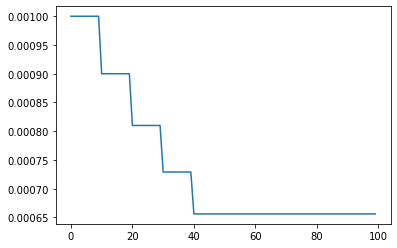

In [9]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 80 % drop

In [3]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 1
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'greedy',k=0.48)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified
num_pruned 34
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49, 58, 60, 42, 22, 13, 8, 33, 23, 63, 14, 61, 6, 59, 29, 12, 35, 7, 40, 38, 28, 47]
num_pruned 34
indices_pruned !!!  [11, 55, 48, 13, 0, 7, 44, 53, 21, 23, 1, 50, 2, 39, 19, 28, 18, 16, 24, 31, 3, 22, 42, 49, 58, 51, 32, 54, 33, 9, 27, 38, 14, 41]
num_pruned 67
indices_pruned !!!  [1, 116, 73, 7, 127, 74, 101, 23, 99, 105, 97, 84, 57, 100, 47, 56, 75, 33, 69, 109, 42, 71, 113, 32, 120, 25, 103, 62, 12, 59, 10, 9, 65, 16, 22, 18, 3, 60, 14, 4, 79, 38, 61, 46, 85, 111, 28, 90, 40, 36, 6, 26, 76, 94, 123, 29, 63, 50, 51, 72, 95, 5, 67, 53, 48, 124, 86]
num_pruned 67
indices_pruned !!!  [113, 33, 1, 125, 27, 88, 43, 81, 32, 97, 98, 8, 73, 82, 118, 53, 0, 101, 122, 15, 89, 93, 92, 13, 110, 6, 28, 90, 126, 83, 44, 75, 54, 74, 78, 36, 56, 103, 52, 66, 34, 67, 20, 31, 119, 24, 23, 10, 49, 112, 3, 47, 22, 87, 37, 68, 76, 114, 115, 107, 55, 35, 16, 77, 99, 2, 124]
num_pruned

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.4610120024522555	Top1 Acc: 0.049860000004768375


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.1990091166918795	Top1 Acc: 0.0961


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.9412902194215818	Top1 Acc: 0.1309000000143051


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.6280552616602257	Top1 Acc: 0.1836


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.4607925250402194	Top1 Acc: 0.2082600000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.162429607367214	Top1 Acc: 0.2419


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.050216493094364	Top1 Acc: 0.26953999999046324


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.7954088826722736	Top1 Acc: 0.3025


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.7328821259081515	Top1 Acc: 0.32234000002861024


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.5435710255103774	Top1 Acc: 0.3537


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.502787027822431	Top1 Acc: 0.3653199999904633


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.344582424888128	Top1 Acc: 0.3897


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.3135527482118143	Top1 Acc: 0.40349999999046327


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.1793203565138803	Top1 Acc: 0.428


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 2.1465406603825365	Top1 Acc: 0.43702


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.058056752892989	Top1 Acc: 0.4489


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 2.017233428747758	Top1 Acc: 0.4629599999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9330056407783605	Top1 Acc: 0.4764


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.9071168250135144	Top1 Acc: 0.4890800000095367


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8492374812500387	Top1 Acc: 0.4987


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8056043081576256	Top1 Acc: 0.51354


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.7811138810990732	Top1 Acc: 0.5149


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.736629344618229	Top1 Acc: 0.52854


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.7275888874560972	Top1 Acc: 0.5237


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6755236149443995	Top1 Acc: 0.54088


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.688632192490976	Top1 Acc: 0.5309


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6138831361785264	Top1 Acc: 0.5552599999809266


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.6548484609096865	Top1 Acc: 0.5384


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.558763956169948	Top1 Acc: 0.5712000000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.620231201377096	Top1 Acc: 0.5497


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5128748355924015	Top1 Acc: 0.57864


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.5992999288100231	Top1 Acc: 0.5549


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.4766824346064302	Top1 Acc: 0.58854


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.568398446976384	Top1 Acc: 0.5636


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.439799042918798	Top1 Acc: 0.5976200000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.5490405695347846	Top1 Acc: 0.5694


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.4083082352757759	Top1 Acc: 0.60598


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.534709636169144	Top1 Acc: 0.5718


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.364977012509885	Top1 Acc: 0.6201800000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.5291729214825207	Top1 Acc: 0.5772


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.3359629658177077	Top1 Acc: 0.6240800000572204


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.5119034157523625	Top1 Acc: 0.5806


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.3084250743431813	Top1 Acc: 0.6308600000572204


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.49993488909323	Top1 Acc: 0.5848


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.2859732575733642	Top1 Acc: 0.6360800000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4810326454005664	Top1 Acc: 0.5883


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.265428144303734	Top1 Acc: 0.64058


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4706875161279607	Top1 Acc: 0.5898


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.236357907352545	Top1 Acc: 0.648000000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4668236382399933	Top1 Acc: 0.5886


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.2242511931587667	Top1 Acc: 0.6492400000572205


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.455341576020929	Top1 Acc: 0.5983


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.1966285405256558	Top1 Acc: 0.658240000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.459141108054149	Top1 Acc: 0.5936


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.1733921569631534	Top1 Acc: 0.6640000000190734


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4425967358335663	Top1 Acc: 0.6018


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.159777330772956	Top1 Acc: 0.6665000000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4358944953242434	Top1 Acc: 0.6017


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.1381319877131821	Top1 Acc: 0.67432


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.440486711791799	Top1 Acc: 0.6047


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.1173209220247196	Top1 Acc: 0.6790600000572204


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4342209085633484	Top1 Acc: 0.6037


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.0987952459803627	Top1 Acc: 0.6835800000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4316767574865608	Top1 Acc: 0.6047


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.0779778737851116	Top1 Acc: 0.6884800000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4296704726883127	Top1 Acc: 0.6097


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.063176455400179	Top1 Acc: 0.6921400000572204


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4168026236039173	Top1 Acc: 0.6145


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.047661682833796	Top1 Acc: 0.6962600000572204


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4032922937900205	Top1 Acc: 0.6129


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.0385304050677269	Top1 Acc: 0.6995000000381469


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4083709460270555	Top1 Acc: 0.6103


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.0265145484748703	Top1 Acc: 0.7013000000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4170102922222283	Top1 Acc: 0.6115


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.0126814554109598	Top1 Acc: 0.7063000000190734


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.419795733463915	Top1 Acc: 0.609


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.9986059735803043	Top1 Acc: 0.7102000000572205


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4081561459770686	Top1 Acc: 0.6119


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.980568834887746	Top1 Acc: 0.7128799999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4001142239268822	Top1 Acc: 0.6213


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.964200992413494	Top1 Acc: 0.7200800000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.403646810899807	Top1 Acc: 0.6194


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.9505628621791635	Top1 Acc: 0.72228


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.3988514331322681	Top1 Acc: 0.6204


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.936940187993257	Top1 Acc: 0.7270800000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4063590417934368	Top1 Acc: 0.616


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.9303885358373832	Top1 Acc: 0.72928


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.3912102708333656	Top1 Acc: 0.6227


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.9147721609800977	Top1 Acc: 0.73132


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.4073104964026921	Top1 Acc: 0.6206


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.9046276855041914	Top1 Acc: 0.7340800000572204


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.3937381588959996	Top1 Acc: 0.6247


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.8915288690715799	Top1 Acc: 0.7377


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.3991490496864802	Top1 Acc: 0.6285


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.8791769761258684	Top1 Acc: 0.7418800000572204


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.3933708924281447	Top1 Acc: 0.6273


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.8733479592501355	Top1 Acc: 0.742640000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.393853281872182	Top1 Acc: 0.6291


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.8656405907152863	Top1 Acc: 0.743380000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.4053696710852128	Top1 Acc: 0.6248


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.8514054515172759	Top1 Acc: 0.74886


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.4041902370090726	Top1 Acc: 0.6303


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.8382152669570025	Top1 Acc: 0.7525600000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.3989060536215576	Top1 Acc: 0.6252


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.8294226946428304	Top1 Acc: 0.75496


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.3972156470334982	Top1 Acc: 0.6305


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.821393430842768	Top1 Acc: 0.75748


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.4035223194315463	Top1 Acc: 0.6308


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.8117675433683273	Top1 Acc: 0.7595200000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.4077550150171112	Top1 Acc: 0.6251


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.8004686962765502	Top1 Acc: 0.7631400000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.408501763132554	Top1 Acc: 0.6267


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.801005494106761	Top1 Acc: 0.762040000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4035841656636587	Top1 Acc: 0.6327


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.7854394296855878	Top1 Acc: 0.7659400000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4056954255586938	Top1 Acc: 0.6281


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.7751078197870718	Top1 Acc: 0.76724


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4152983804292316	Top1 Acc: 0.6316


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.7632723151875274	Top1 Acc: 0.77552


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.402027683167518	Top1 Acc: 0.6316


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.7559116478923642	Top1 Acc: 0.7728400000572204


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.419575654253175	Top1 Acc: 0.633


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.7464750541750428	Top1 Acc: 0.7749800000381469


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4138840685916851	Top1 Acc: 0.6292


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.7411241263074948	Top1 Acc: 0.7796


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4212900566149362	Top1 Acc: 0.6319


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.7290405317035782	Top1 Acc: 0.7817800000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.433793184877951	Top1 Acc: 0.6294


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7188927626518338	Top1 Acc: 0.7843200000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4227711422533929	Top1 Acc: 0.6306


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.71135800284193	Top1 Acc: 0.7862000000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4254280796533898	Top1 Acc: 0.6306


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7159694864621857	Top1 Acc: 0.7846800000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4365072914316683	Top1 Acc: 0.6325


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.6923958314654163	Top1 Acc: 0.791580000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4241293555573573	Top1 Acc: 0.6336


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.683527839839306	Top1 Acc: 0.7937199999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4216986819158626	Top1 Acc: 0.636


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6803259626221474	Top1 Acc: 0.7979199999809266


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4164102311375775	Top1 Acc: 0.6351


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.671891962780672	Top1 Acc: 0.796240000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4229743088348001	Top1 Acc: 0.6327


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.665072383325728	Top1 Acc: 0.8003600000572204


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.4266483112226558	Top1 Acc: 0.6346


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6538303717018088	Top1 Acc: 0.8020000000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4386553900151313	Top1 Acc: 0.6335


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6461355811189813	Top1 Acc: 0.8046600000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.4302210800255402	Top1 Acc: 0.6383


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.6379161515199315	Top1 Acc: 0.805820000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.4433954727800586	Top1 Acc: 0.6328


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.626858658040576	Top1 Acc: 0.80956


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.4562783527977858	Top1 Acc: 0.6345


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6235825907238914	Top1 Acc: 0.8101800000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.4354205720032318	Top1 Acc: 0.636


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6206462608121545	Top1 Acc: 0.8110199999809266


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.4358355621748333	Top1 Acc: 0.6361


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6118497282952604	Top1 Acc: 0.8156200000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.4327725986891156	Top1 Acc: 0.6376


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.599781608185195	Top1 Acc: 0.8162999999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.4339756694021104	Top1 Acc: 0.6393


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5891520808572355	Top1 Acc: 0.8201800000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.4418266438230682	Top1 Acc: 0.6349


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5874830828908154	Top1 Acc: 0.8209200000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.4404553914371925	Top1 Acc: 0.6357


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.583732035839954	Top1 Acc: 0.8224199999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.4624752673921706	Top1 Acc: 0.6372


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.568024533560209	Top1 Acc: 0.8267200000572205


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.4579515774038774	Top1 Acc: 0.639


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.567359116223767	Top1 Acc: 0.8282199999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.4474576462673236	Top1 Acc: 0.6387


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.5487530837430978	Top1 Acc: 0.8322


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.4559475500372392	Top1 Acc: 0.6409


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.5484529821311727	Top1 Acc: 0.83082


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.4691115700745885	Top1 Acc: 0.6343


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.5381384023162715	Top1 Acc: 0.8331


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.4821644795091846	Top1 Acc: 0.6375


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.5349446306448153	Top1 Acc: 0.8375800000381469


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.4797667106495629	Top1 Acc: 0.6418


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.528179999736264	Top1 Acc: 0.83802


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.462875731383698	Top1 Acc: 0.639


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.518211714065898	Top1 Acc: 0.841440000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.4722637707674051	Top1 Acc: 0.6364


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.5117368411530009	Top1 Acc: 0.842720000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.4724111134492899	Top1 Acc: 0.6396


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.5108141844992138	Top1 Acc: 0.8437799999809266


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.4861672618721105	Top1 Acc: 0.636


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.5104461156041421	Top1 Acc: 0.8421800000190734


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.4889300148698348	Top1 Acc: 0.6388


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.4981199671392855	Top1 Acc: 0.845960000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.4887555958349494	Top1 Acc: 0.6358


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.4934620128568176	Top1 Acc: 0.8475599999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.4954499142079414	Top1 Acc: 0.6387


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.4771265689369358	Top1 Acc: 0.85356


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.5005616839927962	Top1 Acc: 0.6381


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.47124882686473524	Top1 Acc: 0.8546800000381469


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.485546359532996	Top1 Acc: 0.6373


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.47604735035573126	Top1 Acc: 0.8540599999809265


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.4971191754823998	Top1 Acc: 0.6366


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.4661639518749988	Top1 Acc: 0.8551599999809265


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 104.49it/s]


Validation results at epoch-99 | loss: 1.4823724069172823	Top1 Acc: 0.6415
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 203, 92, 104, 151, 30, 216, 93, 3, 113, 186, 211, 38, 125, 52, 181, 83, 40, 234, 209, 176, 163, 128, 33, 219, 221, 147, 105, 238, 201, 42, 168, 254, 74, 198, 95, 190, 39, 76, 73, 82, 89, 49, 160, 162, 66, 11, 148, 249, 25, 171, 224, 197, 43, 77, 2, 152, 120, 86, 8, 46, 200, 4, 54, 213, 177, 191, 35, 58, 61, 185, 102, 7, 212, 28, 37, 232, 187, 205, 80, 207, 208, 155, 146, 20, 240, 231, 34, 199, 27, 182, 97, 136, 71, 236, 119, 220, 245, 50, 88, 10, 60, 239, 65, 17, 126, 127, 59, 14, 9, 252, 227, 15, 173, 150, 47, 247, 96, 16, 72, 242, 174, 122, 255, 64, 94, 170, 124, 114, 48, 142, 106, 5, 81]
num_pruned 267
indices_pruned !!!  [399, 79, 67, 64, 126, 487, 81, 156, 183, 338, 477, 83, 361, 274, 246, 429, 481, 443, 446, 309, 62, 300, 347, 502, 272, 391, 495, 406, 46, 472, 104, 8, 11, 180, 89, 497, 438, 292, 129, 447, 37, 78, 90, 328, 26, 157, 96, 364, 114, 231, 333, 337, 467, 68, 105, 252, 61, 329, 324, 199, 159, 253, 110, 176, 405, 256, 151, 351, 152

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.481655418415508	Top1 Acc: 0.051440000007152556


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.243708954581732	Top1 Acc: 0.108


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.972217816526018	Top1 Acc: 0.1385600000023842


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.6311532394795476	Top1 Acc: 0.179


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.4600860523750714	Top1 Acc: 0.20990000002861023


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.1720559385758413	Top1 Acc: 0.2437


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.0594332584029877	Top1 Acc: 0.27200000002861024


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.8326094814493685	Top1 Acc: 0.3026


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.7629568771937922	Top1 Acc: 0.3211200000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.577446949632862	Top1 Acc: 0.3471


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.5198946535739752	Top1 Acc: 0.36520000002861025


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.380665244935434	Top1 Acc: 0.3867


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.327345313623433	Top1 Acc: 0.4031800000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.199409501462043	Top1 Acc: 0.4248


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 2.1618168378425073	Top1 Acc: 0.43578000001907347


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.059384077410155	Top1 Acc: 0.4537


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 2.0308523809208587	Top1 Acc: 0.46026000005722045


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.96040515356426	Top1 Acc: 0.4724


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.9201917852587103	Top1 Acc: 0.48504000002861025


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8755945072898381	Top1 Acc: 0.4955


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.825244997468446	Top1 Acc: 0.5059399999809265


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.810783962660198	Top1 Acc: 0.5072


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.7568851373994443	Top1 Acc: 0.5224200000572204


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.7579263871229147	Top1 Acc: 0.5205


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.7005189602332347	Top1 Acc: 0.53628


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.7070201454283316	Top1 Acc: 0.5293


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.649197213789996	Top1 Acc: 0.547020000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.6573406654068186	Top1 Acc: 0.542


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5974760881775176	Top1 Acc: 0.5577600000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.6371556052678748	Top1 Acc: 0.5435


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.549486906632133	Top1 Acc: 0.5718600000190734


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.6307447303699543	Top1 Acc: 0.5505


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5066837938240423	Top1 Acc: 0.5813999999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.5883045603957358	Top1 Acc: 0.5621


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.464278559550605	Top1 Acc: 0.5910400000381469


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.5727895573724675	Top1 Acc: 0.5664


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.4379607106718566	Top1 Acc: 0.5963200000572204


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.547005425525617	Top1 Acc: 0.573


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.3924587105241273	Top1 Acc: 0.6074199999809266


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.5351993298228783	Top1 Acc: 0.5792


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.3603899465192615	Top1 Acc: 0.6171600000572205


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.5118517362618749	Top1 Acc: 0.5792


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.3395927101754777	Top1 Acc: 0.622640000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.503498483307754	Top1 Acc: 0.5827


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.3142165268778496	Top1 Acc: 0.62804


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4875108697746373	Top1 Acc: 0.5907


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.2850961996161419	Top1 Acc: 0.6345000000190735


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.483714357207093	Top1 Acc: 0.5901


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.2608316231261738	Top1 Acc: 0.64298


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.46976100493081	Top1 Acc: 0.5944


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.2347829991289416	Top1 Acc: 0.6498400000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4484040540984915	Top1 Acc: 0.5979


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.2157852120716552	Top1 Acc: 0.653160000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4372364463685434	Top1 Acc: 0.6028


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.1994696757982455	Top1 Acc: 0.6569200000572205


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4447109608710567	Top1 Acc: 0.6005


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.1754500795813168	Top1 Acc: 0.6638200000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4367111197000817	Top1 Acc: 0.604


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.1572236542201713	Top1 Acc: 0.66966


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4173617181898672	Top1 Acc: 0.6071


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.1335690362983957	Top1 Acc: 0.6739


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.403128921231137	Top1 Acc: 0.6088


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.1205375892731844	Top1 Acc: 0.6778799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4045144696778888	Top1 Acc: 0.6157


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.1008106345105964	Top1 Acc: 0.6810600000381469


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.394669377351109	Top1 Acc: 0.6146


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.090607923772329	Top1 Acc: 0.6846000000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4049626105948338	Top1 Acc: 0.614


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.0742144509959404	Top1 Acc: 0.6905000000381469


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4022407320481312	Top1 Acc: 0.615


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.0490678897904009	Top1 Acc: 0.695540000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.3990943997721128	Top1 Acc: 0.6151


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.0394673634063252	Top1 Acc: 0.69948


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.3914281461812272	Top1 Acc: 0.6201


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.0204985439015166	Top1 Acc: 0.701300000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.3812030101124244	Top1 Acc: 0.622


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.0125203556416895	Top1 Acc: 0.7042000000572205


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.3922303945203371	Top1 Acc: 0.6209


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.9989167621068638	Top1 Acc: 0.7078400000190734


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.3999095264869401	Top1 Acc: 0.6192


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.9769835568145108	Top1 Acc: 0.7150000000572204


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.374078566514993	Top1 Acc: 0.6239


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.9609874718634369	Top1 Acc: 0.7187199999809265


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.3750747562963752	Top1 Acc: 0.6286


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.9513010660095897	Top1 Acc: 0.7216000000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.3792324594304533	Top1 Acc: 0.6268


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.9383950463646208	Top1 Acc: 0.7255800000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.387706056425843	Top1 Acc: 0.6259


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.9306519589460719	Top1 Acc: 0.7276600000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.3727704316754885	Top1 Acc: 0.626


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.9166860255743842	Top1 Acc: 0.7293999999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.3681504892397531	Top1 Acc: 0.6296


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.8954076056590166	Top1 Acc: 0.73644


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.3703675873671906	Top1 Acc: 0.6293


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.8923242250671777	Top1 Acc: 0.7362000000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.3670663758169246	Top1 Acc: 0.6292


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.8939928459694318	Top1 Acc: 0.7354600000572205


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.3629066823404046	Top1 Acc: 0.633


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.8794514230450096	Top1 Acc: 0.7417000000190734


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.3712915521633775	Top1 Acc: 0.6342


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.8625241077464559	Top1 Acc: 0.7469599999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.3676077715958221	Top1 Acc: 0.6331


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.8512312533605434	Top1 Acc: 0.7491599999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.3707335749758949	Top1 Acc: 0.6352


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.8435520945912431	Top1 Acc: 0.74868


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.3858519528485551	Top1 Acc: 0.6302


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.8416429142208051	Top1 Acc: 0.7515800000572205


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.3642625310752965	Top1 Acc: 0.6394


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.8245376350782107	Top1 Acc: 0.75538


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.3764089278027982	Top1 Acc: 0.6339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.8063796507123181	Top1 Acc: 0.7614999999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.3790112190608736	Top1 Acc: 0.6323


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.808715265044166	Top1 Acc: 0.7592400000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.3760432993309408	Top1 Acc: 0.6373


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.7932445710272436	Top1 Acc: 0.7618600000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.3707379042347776	Top1 Acc: 0.6367


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.7829817507577979	Top1 Acc: 0.7653400000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.3729938427104225	Top1 Acc: 0.6363


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.7754290933194368	Top1 Acc: 0.7704400000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.3840795634668084	Top1 Acc: 0.6334


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.7700774954712909	Top1 Acc: 0.7683999999809266


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.3732355629341513	Top1 Acc: 0.639


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.7597968023451392	Top1 Acc: 0.773140000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.367736098132556	Top1 Acc: 0.6364


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.753142726695751	Top1 Acc: 0.7744199999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3662406704093837	Top1 Acc: 0.6387


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.7383504843010622	Top1 Acc: 0.7792599999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3690792940839935	Top1 Acc: 0.6431


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7362165653797061	Top1 Acc: 0.7805200000572204


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3751626218421549	Top1 Acc: 0.6417


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7266500652446162	Top1 Acc: 0.78164


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3815510438967356	Top1 Acc: 0.6422


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7164018875192804	Top1 Acc: 0.7867200000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3879810843286635	Top1 Acc: 0.6416


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7065725658860658	Top1 Acc: 0.7876000000572204


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3805944406533543	Top1 Acc: 0.6418


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6964532880831862	Top1 Acc: 0.7898400000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3892510933212088	Top1 Acc: 0.6414


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6996535994207768	Top1 Acc: 0.7907999999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3935968513730206	Top1 Acc: 0.6389


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6801451638226619	Top1 Acc: 0.79418


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3820460114297988	Top1 Acc: 0.6413


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6758785506953364	Top1 Acc: 0.7990800000572205


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.388350849664664	Top1 Acc: 0.6423


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6754599539062861	Top1 Acc: 0.7963000000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.373914607718021	Top1 Acc: 0.6432


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6579819807920919	Top1 Acc: 0.8015000000381469


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3951248247412187	Top1 Acc: 0.6456


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.6601977761444229	Top1 Acc: 0.7999199999809266


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3922617797610126	Top1 Acc: 0.644


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.6464288930606354	Top1 Acc: 0.8041400000572204


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.4002516948724095	Top1 Acc: 0.6438


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6326029331940214	Top1 Acc: 0.8086600000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.398168817351136	Top1 Acc: 0.644


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6206667459072055	Top1 Acc: 0.8126200000381469


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.4064331537560573	Top1 Acc: 0.6443


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6178962995329171	Top1 Acc: 0.8127800000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3957968980451174	Top1 Acc: 0.6438


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.6098918113714594	Top1 Acc: 0.8149400000381469


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.4244188402272477	Top1 Acc: 0.6398


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.6047261435052623	Top1 Acc: 0.8172800000572205


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.4219875780841973	Top1 Acc: 0.6457


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5976468703478498	Top1 Acc: 0.81558


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.413717647142048	Top1 Acc: 0.6434


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.5916472400545769	Top1 Acc: 0.8188800000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.416254742236077	Top1 Acc: 0.6433


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.5853506673479933	Top1 Acc: 0.82298


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.4289965976642658	Top1 Acc: 0.6418


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.573329433303355	Top1 Acc: 0.8254800000381469


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.4405141435092008	Top1 Acc: 0.6412


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.5662163146164106	Top1 Acc: 0.82646


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.4299852003025104	Top1 Acc: 0.6442


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.5685681422500659	Top1 Acc: 0.8266399999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.45186886757235	Top1 Acc: 0.6412


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.5529311598871675	Top1 Acc: 0.8330400000381469


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.4363774755333043	Top1 Acc: 0.6443


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.5504974571182905	Top1 Acc: 0.8333600000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.4334538903417466	Top1 Acc: 0.6448


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.5437784233818883	Top1 Acc: 0.8342600000381469


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.4232443133486976	Top1 Acc: 0.6453


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.5320062849222852	Top1 Acc: 0.8367800000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.430278142796287	Top1 Acc: 0.6442


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.5222184655001706	Top1 Acc: 0.840620000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.4446365350409398	Top1 Acc: 0.6426


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.5163836778734651	Top1 Acc: 0.8423799999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.437635578686678	Top1 Acc: 0.6466


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.5160497208995283	Top1 Acc: 0.8421800000190734


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.4513074612315697	Top1 Acc: 0.6455


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.5077192072215897	Top1 Acc: 0.8433000000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.4521734276904334	Top1 Acc: 0.6437


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.5009588706676308	Top1 Acc: 0.8463199999809266


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.4488126997706257	Top1 Acc: 0.6462


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.49499442727516985	Top1 Acc: 0.8479800000572204


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.4488705607909191	Top1 Acc: 0.6479


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.49060544013367285	Top1 Acc: 0.8503000000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.450013743171209	Top1 Acc: 0.6455


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.4765945743874211	Top1 Acc: 0.8530799999809265


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.4724942098689984	Top1 Acc: 0.6431


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.4731629939792711	Top1 Acc: 0.8533599999809265


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 93.40it/s]


Validation results at epoch-99 | loss: 1.4804184119912642	Top1 Acc: 0.6439
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 219, 203, 80, 125, 38, 30, 221, 92, 201, 186, 234, 131, 211, 76, 83, 191, 8, 152, 238, 104, 40, 185, 3, 93, 147, 128, 33, 52, 35, 113, 120, 187, 10, 150, 77, 240, 176, 192, 224, 42, 73, 2, 198, 216, 54, 25, 200, 220, 249, 119, 197, 46, 247, 124, 43, 148, 122, 37, 95, 212, 199, 32, 160, 209, 49, 162, 242, 105, 231, 208, 207, 11, 151, 60, 50, 34, 70, 27, 136, 190, 254, 236, 102, 58, 243, 74, 232, 82, 163, 114, 71, 47, 86, 127, 14, 81, 177, 239, 252, 59, 28, 244, 88, 87, 126, 213, 4, 72, 61, 51, 39, 182, 48, 15, 116, 97, 168, 228, 20, 16, 165, 233, 9, 85, 178, 142, 218, 214, 100, 155, 12, 69, 65]
num_pruned 267
indices_pruned !!!  [399, 164, 495, 64, 481, 86, 83, 155, 67, 79, 81, 443, 183, 487, 347, 104, 176, 364, 477, 385, 13, 229, 96, 34, 300, 156, 338, 429, 286, 293, 446, 361, 126, 220, 324, 341, 90, 141, 246, 105, 309, 261, 439, 206, 282, 8, 383, 353, 328, 153, 196, 50, 266, 89, 125, 259, 18, 352, 75, 502, 497, 369, 438, 77, 272, 204, 110, 194,

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.454373551146759	Top1 Acc: 0.051140000007152554


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.160750431350515	Top1 Acc: 0.0972


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.8924373098651466	Top1 Acc: 0.14098000000476837


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.561995666238326	Top1 Acc: 0.1902


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.3992678393488345	Top1 Acc: 0.21999999999046327


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.1157460061809683	Top1 Acc: 0.2583


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.015393513852678	Top1 Acc: 0.28195999999523164


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.779224954073942	Top1 Acc: 0.3156


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.707209932834596	Top1 Acc: 0.3351799999904633


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.5220601437967036	Top1 Acc: 0.3563


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.465147618442545	Top1 Acc: 0.3746199999809265


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.318912993503522	Top1 Acc: 0.3975


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.2748326154621057	Top1 Acc: 0.41358000000953676


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.165571641318406	Top1 Acc: 0.4286


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 2.126623110698007	Top1 Acc: 0.44096


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0260058686703064	Top1 Acc: 0.4584


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 2.002492904967969	Top1 Acc: 0.46702


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9306701798982258	Top1 Acc: 0.481


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8898959379366902	Top1 Acc: 0.4937200000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8538844298712815	Top1 Acc: 0.4939


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8097663733660412	Top1 Acc: 0.50866


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.7879366256013702	Top1 Acc: 0.5109


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.7363574611561379	Top1 Acc: 0.5274400000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.730843645107897	Top1 Acc: 0.5247


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6750574081450167	Top1 Acc: 0.54056


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.701757550239563	Top1 Acc: 0.5277


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.617246917446556	Top1 Acc: 0.5545400000572205


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.6663442125803307	Top1 Acc: 0.5361


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5632144660900926	Top1 Acc: 0.5666000000572204


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.6320347167268585	Top1 Acc: 0.546


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.520655980043094	Top1 Acc: 0.576740000038147


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.6001794655111772	Top1 Acc: 0.5586


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.4877308988205307	Top1 Acc: 0.586440000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.5753549005411849	Top1 Acc: 0.56


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.4412048308135907	Top1 Acc: 0.595760000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.5583079781713365	Top1 Acc: 0.5647


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.4114572166481896	Top1 Acc: 0.6027600000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.535223195824442	Top1 Acc: 0.5706


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.3831377376985672	Top1 Acc: 0.6107000000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.5286679931833773	Top1 Acc: 0.5729


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.3403866614222222	Top1 Acc: 0.6219


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.505293828022631	Top1 Acc: 0.579


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.3159758665067764	Top1 Acc: 0.6274400000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4814919414399546	Top1 Acc: 0.5893


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.2849077551871004	Top1 Acc: 0.6369399999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4874970641317247	Top1 Acc: 0.5846


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.2649759142600057	Top1 Acc: 0.642


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4757399649559697	Top1 Acc: 0.59


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.2361843131692207	Top1 Acc: 0.6464400000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.468839536739301	Top1 Acc: 0.5926


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.224973587886147	Top1 Acc: 0.651600000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4481500492820256	Top1 Acc: 0.5974


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.1942371671157115	Top1 Acc: 0.65944


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4384356269353553	Top1 Acc: 0.598


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.1787520503753897	Top1 Acc: 0.6612799999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4457251844526846	Top1 Acc: 0.5987


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.1669386642058488	Top1 Acc: 0.66556


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4454751452313195	Top1 Acc: 0.5956


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.13814956803456	Top1 Acc: 0.672220000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.422165863121612	Top1 Acc: 0.6061


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.1177731343852284	Top1 Acc: 0.6783199999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4139699898188627	Top1 Acc: 0.6064


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.1033589763714529	Top1 Acc: 0.6823400000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4112478751170485	Top1 Acc: 0.6089


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.08956175768162	Top1 Acc: 0.6858


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.396637711343886	Top1 Acc: 0.6152


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.0741060002685507	Top1 Acc: 0.68962


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.3937731294692317	Top1 Acc: 0.6106


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.0561241751436687	Top1 Acc: 0.6942199999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4036079358450975	Top1 Acc: 0.6184


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.0435004537672643	Top1 Acc: 0.6973800000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.39247588492647	Top1 Acc: 0.6184


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.0301840541612766	Top1 Acc: 0.70234


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.3860716072818902	Top1 Acc: 0.6203


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.0092329892051188	Top1 Acc: 0.705460000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.3942502895488014	Top1 Acc: 0.6207


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.000560442962305	Top1 Acc: 0.7092200000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.380473108231267	Top1 Acc: 0.6235


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.9881753130337162	Top1 Acc: 0.7117599999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.396245383763615	Top1 Acc: 0.6241


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.9643548416054767	Top1 Acc: 0.7194400000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.3838430552542964	Top1 Acc: 0.6239


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.9546032898566302	Top1 Acc: 0.7204000000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.364446984061712	Top1 Acc: 0.6267


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.9417759358425579	Top1 Acc: 0.723620000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.3754704873773116	Top1 Acc: 0.63


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.9262537398301732	Top1 Acc: 0.7279599999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.3690735456309742	Top1 Acc: 0.6325


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.9211819870087802	Top1 Acc: 0.730960000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.3753921842273278	Top1 Acc: 0.6292


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.9089602968272041	Top1 Acc: 0.7350200000381469


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.3704302424116979	Top1 Acc: 0.6293


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.8957341843858704	Top1 Acc: 0.73622


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.3686591258531884	Top1 Acc: 0.6266


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.8812461998456579	Top1 Acc: 0.739


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.3671059623549255	Top1 Acc: 0.6305


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.8781518244072605	Top1 Acc: 0.74108


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.3552277963372725	Top1 Acc: 0.6339


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.868007428658283	Top1 Acc: 0.7429199999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.3582013702090783	Top1 Acc: 0.6342


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.8578743577918129	Top1 Acc: 0.7489399999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.3720358421530905	Top1 Acc: 0.6334


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.847149068437269	Top1 Acc: 0.7507800000381469


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.3616776141939284	Top1 Acc: 0.639


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.8379729666063548	Top1 Acc: 0.7497


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.3558850280846222	Top1 Acc: 0.637


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.8179929904315782	Top1 Acc: 0.7560400000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.3677911599980126	Top1 Acc: 0.6352


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.8160744391743789	Top1 Acc: 0.7572400000190734


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.364680618424959	Top1 Acc: 0.6399


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.8045963472722436	Top1 Acc: 0.758720000038147


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.386639533163626	Top1 Acc: 0.6337


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.7967547515926459	Top1 Acc: 0.7630599999809266


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.3672283261637144	Top1 Acc: 0.6386


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.7845112361261607	Top1 Acc: 0.76636


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.3613987964919851	Top1 Acc: 0.6384


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.7756037379774596	Top1 Acc: 0.76914


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.3668833329707761	Top1 Acc: 0.635


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.7655011226454049	Top1 Acc: 0.7694200000572204


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.3767663006541095	Top1 Acc: 0.6376


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.7580826045454615	Top1 Acc: 0.7735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.365348539774931	Top1 Acc: 0.6406


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.7426504825844484	Top1 Acc: 0.7775400000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.3667910332921185	Top1 Acc: 0.6426


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.7348865863612241	Top1 Acc: 0.7793200000381469


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3754216183589985	Top1 Acc: 0.6428


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.729263736997419	Top1 Acc: 0.7805200000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3828405617158623	Top1 Acc: 0.6391


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7213613595194219	Top1 Acc: 0.78322


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3824751595907574	Top1 Acc: 0.64


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7145952816357088	Top1 Acc: 0.7855800000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3645348880864396	Top1 Acc: 0.6427


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.6995707716783295	Top1 Acc: 0.7896199999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3817654501033734	Top1 Acc: 0.644


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7020417089809847	Top1 Acc: 0.7894000000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3747645329825486	Top1 Acc: 0.6418


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6878371991007529	Top1 Acc: 0.7936400000381469


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.392518733875661	Top1 Acc: 0.6382


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6790975816262043	Top1 Acc: 0.79538


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.394121154954162	Top1 Acc: 0.6389


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6737847501969398	Top1 Acc: 0.7976399999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3873610224904893	Top1 Acc: 0.642


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.663583110436759	Top1 Acc: 0.7990800000381469


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3882991075515747	Top1 Acc: 0.6408


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6619190082068334	Top1 Acc: 0.8004399999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3763378556770614	Top1 Acc: 0.6445


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6486272383528902	Top1 Acc: 0.80424


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3953811594202548	Top1 Acc: 0.6434


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.6396172362977587	Top1 Acc: 0.8070400000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3949909579904773	Top1 Acc: 0.6429


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.6338173558797373	Top1 Acc: 0.808100000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.4048184231866765	Top1 Acc: 0.6436


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6239343441813193	Top1 Acc: 0.8107199999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3926594015918201	Top1 Acc: 0.6439


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6140179540342687	Top1 Acc: 0.8132400000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.4020174575757376	Top1 Acc: 0.641


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6111673394889783	Top1 Acc: 0.814660000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.4109574858146379	Top1 Acc: 0.6447


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.6115879129875651	Top1 Acc: 0.8165200000190734


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.414423799212975	Top1 Acc: 0.6421


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.6027714494244217	Top1 Acc: 0.8165800000572204


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.4394928186754636	Top1 Acc: 0.6404


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5850219519241996	Top1 Acc: 0.82124


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.4132621514646313	Top1 Acc: 0.6446


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.5838937267775426	Top1 Acc: 0.82204


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.4314617906944662	Top1 Acc: 0.6392


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.5738235200610002	Top1 Acc: 0.8261399999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.430795980405204	Top1 Acc: 0.6399


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.5726106377971142	Top1 Acc: 0.8251200000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.407406448563443	Top1 Acc: 0.6447


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.5546826770543443	Top1 Acc: 0.830240000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.427294836014132	Top1 Acc: 0.6448


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.5489093066786256	Top1 Acc: 0.833840000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.415549064738841	Top1 Acc: 0.6473


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.5421045022394956	Top1 Acc: 0.83468


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.4351731591586825	Top1 Acc: 0.6476


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.5390980397648824	Top1 Acc: 0.83456


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.4286665403390233	Top1 Acc: 0.6459


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.5349627615088393	Top1 Acc: 0.8383799999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.4429605444775353	Top1 Acc: 0.6428


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.5275538951692069	Top1 Acc: 0.8403800000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.4326725662509097	Top1 Acc: 0.648


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.5243556145816812	Top1 Acc: 0.8399


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.441480659985844	Top1 Acc: 0.6432


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.509357289661227	Top1 Acc: 0.843220000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.45136051841929	Top1 Acc: 0.6463


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.5108573390242389	Top1 Acc: 0.8429399999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.448944624466232	Top1 Acc: 0.6426


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.4982900348160883	Top1 Acc: 0.8468400000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.4402711655520186	Top1 Acc: 0.6472


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.48858467338944944	Top1 Acc: 0.8509400000572205


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.45445087665244	Top1 Acc: 0.6449


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.4928352444830453	Top1 Acc: 0.8506000000572205


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.4628588851494124	Top1 Acc: 0.6426


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.4829822598058549	Top1 Acc: 0.8521000000572204


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.4569759285902675	Top1 Acc: 0.6451


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.47186582952814027	Top1 Acc: 0.853840000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.46085941263392	Top1 Acc: 0.6425


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.46896013922398655	Top1 Acc: 0.855660000038147


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 90.56it/s]


Validation results at epoch-99 | loss: 1.4677378844611253	Top1 Acc: 0.6426
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 234, 219, 203, 92, 201, 8, 124, 3, 249, 113, 216, 40, 80, 76, 38, 125, 30, 205, 73, 136, 221, 33, 150, 186, 93, 83, 252, 209, 160, 120, 129, 176, 185, 89, 168, 35, 240, 49, 105, 43, 213, 147, 10, 128, 77, 163, 198, 199, 52, 148, 95, 11, 208, 104, 74, 190, 233, 195, 152, 254, 236, 60, 239, 2, 211, 232, 37, 51, 17, 177, 25, 72, 207, 162, 54, 39, 227, 88, 34, 127, 224, 200, 61, 255, 4, 238, 172, 114, 151, 126, 220, 58, 245, 102, 14, 187, 28, 9, 231, 210, 82, 214, 144, 243, 217, 181, 50, 71, 170, 81, 47, 146, 212, 178, 15, 48, 69, 165, 46, 183, 192, 197, 16, 86, 97, 117, 20, 171, 182, 142, 42, 12, 157]
num_pruned 267
indices_pruned !!!  [399, 64, 81, 164, 126, 62, 266, 83, 398, 443, 176, 156, 338, 487, 110, 79, 386, 495, 481, 472, 67, 467, 183, 104, 96, 292, 57, 260, 199, 220, 105, 429, 468, 274, 26, 475, 90, 155, 381, 277, 300, 364, 240, 229, 286, 310, 66, 431, 265, 129, 95, 224, 246, 293, 361, 253, 328, 60, 395, 196, 477, 383, 351, 314, 497, 68, 4

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.474310990794541	Top1 Acc: 0.04532000000476837


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.211942364897909	Top1 Acc: 0.1033


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.928606608944476	Top1 Acc: 0.14008000000476836


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.566421493699279	Top1 Acc: 0.1815


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.40030151498897	Top1 Acc: 0.21208000000953675


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.1039649323572087	Top1 Acc: 0.245


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.9961402550377807	Top1 Acc: 0.2741


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.761363364473174	Top1 Acc: 0.3157


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.6965984883515732	Top1 Acc: 0.3293400000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.5126894184305697	Top1 Acc: 0.3585


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.4609400591886867	Top1 Acc: 0.37212000001907347


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.313240654860871	Top1 Acc: 0.3997


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.2775980423173636	Top1 Acc: 0.41


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.162300278868856	Top1 Acc: 0.4284


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 2.133967187703418	Top1 Acc: 0.4363199999904633


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.043226134927967	Top1 Acc: 0.4527


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 2.011822390129499	Top1 Acc: 0.46200000002861025


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9488898742048046	Top1 Acc: 0.4729


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.9035570536123212	Top1 Acc: 0.4852999999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8634986696364004	Top1 Acc: 0.4845


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8168109066955878	Top1 Acc: 0.5055800000572205


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.8029683586917347	Top1 Acc: 0.5042


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.746587562743965	Top1 Acc: 0.5243600000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.7425332763527013	Top1 Acc: 0.521


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6793236805654852	Top1 Acc: 0.53876


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.7011083032511458	Top1 Acc: 0.5309


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.620261367324673	Top1 Acc: 0.5533800000572204


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.659161934369727	Top1 Acc: 0.5383


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5717506143443114	Top1 Acc: 0.5642800000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.628243716457222	Top1 Acc: 0.5462


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5175066323536437	Top1 Acc: 0.5765200000190734


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.5963302548927596	Top1 Acc: 0.5573


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.4837250694289537	Top1 Acc: 0.5857000000572204


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.5771790576886526	Top1 Acc: 0.561


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.4434876149267797	Top1 Acc: 0.5957399999809265


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.543770402292662	Top1 Acc: 0.5722


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.4132681450880398	Top1 Acc: 0.603320000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.5317273366300366	Top1 Acc: 0.5758


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.3782405755708895	Top1 Acc: 0.6119000000381469


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.5207386424269858	Top1 Acc: 0.5786


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.3412302226361716	Top1 Acc: 0.6202600000190734


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.5039835202543042	Top1 Acc: 0.5833


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.3150610629554904	Top1 Acc: 0.62694


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4911192610294004	Top1 Acc: 0.5896


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.28658829900005	Top1 Acc: 0.6353999999809266


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4725317902202848	Top1 Acc: 0.5952


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.2705963853070192	Top1 Acc: 0.64102


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4649452657639226	Top1 Acc: 0.5946


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.2439738243742062	Top1 Acc: 0.6444199999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.468000197712379	Top1 Acc: 0.5932


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.21873941994689	Top1 Acc: 0.6499800000572205


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4533890108518963	Top1 Acc: 0.599


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.2002973908658527	Top1 Acc: 0.6548400000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4515652362304399	Top1 Acc: 0.6011


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.1772343152014495	Top1 Acc: 0.66376


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.430451537989363	Top1 Acc: 0.6063


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.167119187924563	Top1 Acc: 0.6656800000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.428858294517179	Top1 Acc: 0.6057


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.1431160666753568	Top1 Acc: 0.67512


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4288593787181227	Top1 Acc: 0.6046


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.121502996100794	Top1 Acc: 0.6769800000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4302432303187214	Top1 Acc: 0.61


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.1026493804838957	Top1 Acc: 0.6839400000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4062049841579003	Top1 Acc: 0.6143


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.0786256360275972	Top1 Acc: 0.6897600000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4143425346929817	Top1 Acc: 0.6137


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.0726726556677952	Top1 Acc: 0.6907800000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.3981598713729955	Top1 Acc: 0.6178


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.0522097579353606	Top1 Acc: 0.6970399999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4012277262120307	Top1 Acc: 0.6153


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.038301515914595	Top1 Acc: 0.69808


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.38876164110401	Top1 Acc: 0.6221


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.0306952752725547	Top1 Acc: 0.7017000000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.3905559702764583	Top1 Acc: 0.6217


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.0023880119213973	Top1 Acc: 0.7080800000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.3956608395033245	Top1 Acc: 0.6204


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.9947098194790618	Top1 Acc: 0.7108800000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.38726431055914	Top1 Acc: 0.6232


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.991991053304404	Top1 Acc: 0.7089999999809266


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.393152411979965	Top1 Acc: 0.6232


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.9650444220703887	Top1 Acc: 0.71756


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.390766675713696	Top1 Acc: 0.6227


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.9549924481250441	Top1 Acc: 0.7235800000381469


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.3788966491252561	Top1 Acc: 0.627


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.9374756428896619	Top1 Acc: 0.7255400000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.3821189826047873	Top1 Acc: 0.6277


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.9278415994875876	Top1 Acc: 0.7289400000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.3857801956466482	Top1 Acc: 0.63


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.9183468966532851	Top1 Acc: 0.7298599999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.374333927148505	Top1 Acc: 0.6306


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.8976488464018878	Top1 Acc: 0.7361200000572204


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.3735171926172474	Top1 Acc: 0.6314


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.8970253051394392	Top1 Acc: 0.736420000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.3692726960665063	Top1 Acc: 0.6355


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.8812085457165223	Top1 Acc: 0.7401200000572205


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.3683181872850732	Top1 Acc: 0.6319


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.8774014374484187	Top1 Acc: 0.7398399999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.3824272178396393	Top1 Acc: 0.6324


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.8653520373127345	Top1 Acc: 0.745040000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.380180974549885	Top1 Acc: 0.6371


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.8539992153187237	Top1 Acc: 0.74734


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.3807575959193557	Top1 Acc: 0.6296


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.8404495700850816	Top1 Acc: 0.7514800000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.387500091444088	Top1 Acc: 0.6332


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.8342590548498247	Top1 Acc: 0.7528000000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.3894599419605882	Top1 Acc: 0.6288


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.8278127986451854	Top1 Acc: 0.755380000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.3788453883762601	Top1 Acc: 0.6313


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.8117061739077653	Top1 Acc: 0.7602200000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.371091361287274	Top1 Acc: 0.6378


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.8017796274951047	Top1 Acc: 0.7614200000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.376585243623468	Top1 Acc: 0.6355


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.8022134075384311	Top1 Acc: 0.7618600000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.3702395943146717	Top1 Acc: 0.6369


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.788149943056009	Top1 Acc: 0.7646800000190734


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.3788732810865474	Top1 Acc: 0.6395


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.7795419051214252	Top1 Acc: 0.76762


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.3878468539141402	Top1 Acc: 0.6378


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.7593699404040871	Top1 Acc: 0.7720199999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.3710939386222936	Top1 Acc: 0.6409


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.7600293313450825	Top1 Acc: 0.772680000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.3798968558070026	Top1 Acc: 0.639


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.7496699466729713	Top1 Acc: 0.7774000000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.3791854351381712	Top1 Acc: 0.6427


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.7395881332857225	Top1 Acc: 0.7783799999809266


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3812561963177934	Top1 Acc: 0.6406


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.7346507607366118	Top1 Acc: 0.7810800000381469


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3839957178393496	Top1 Acc: 0.6395


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7171991322656421	Top1 Acc: 0.786720000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3917205854307246	Top1 Acc: 0.6381


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7128235882200549	Top1 Acc: 0.7870399999809266


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3788653189622904	Top1 Acc: 0.6412


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7051702971806002	Top1 Acc: 0.7870599999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4015343249598635	Top1 Acc: 0.639


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.6993183084308644	Top1 Acc: 0.78812


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3931120392642444	Top1 Acc: 0.64


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.685536111331047	Top1 Acc: 0.7930400000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.401955160159099	Top1 Acc: 0.6407


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6750664723956067	Top1 Acc: 0.796240000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3928038176101973	Top1 Acc: 0.6419


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6715050825987325	Top1 Acc: 0.8005200000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.414956336534476	Top1 Acc: 0.6391


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6659753632819866	Top1 Acc: 0.798980000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.393803981286061	Top1 Acc: 0.6445


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6518019502577574	Top1 Acc: 0.8025800000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.420796639557126	Top1 Acc: 0.6408


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6485889236183118	Top1 Acc: 0.802460000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.395642348482639	Top1 Acc: 0.6431


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.638451270892492	Top1 Acc: 0.80692


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.404390651968461	Top1 Acc: 0.6414


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.6375251364372575	Top1 Acc: 0.8079599999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.4147424335721173	Top1 Acc: 0.6429


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6314536315553329	Top1 Acc: 0.8074199999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.4148521249807333	Top1 Acc: 0.643


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6134790076166773	Top1 Acc: 0.8143200000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.4165743672395055	Top1 Acc: 0.6459


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6124253947564098	Top1 Acc: 0.8149


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.413478200948691	Top1 Acc: 0.6448


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.6007179470775682	Top1 Acc: 0.8167400000190734


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.4271612665321254	Top1 Acc: 0.6459


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5908198836819291	Top1 Acc: 0.820460000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.429188895074627	Top1 Acc: 0.642


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5846893316339654	Top1 Acc: 0.8227599999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.4262267373785187	Top1 Acc: 0.6421


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.5735922227125339	Top1 Acc: 0.824440000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.4337010474144658	Top1 Acc: 0.6499


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.5701598289525113	Top1 Acc: 0.8268200000572204


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.4353520885298523	Top1 Acc: 0.6445


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.5627801277296013	Top1 Acc: 0.8284200000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.4361238585242742	Top1 Acc: 0.6449


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.5594484679534307	Top1 Acc: 0.8295199999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.4204866818234891	Top1 Acc: 0.6502


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.544594302811586	Top1 Acc: 0.8337000000190735


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.4359650740140601	Top1 Acc: 0.6467


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.5468948543681513	Top1 Acc: 0.8341799999809265


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.4446350358709503	Top1 Acc: 0.6428


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.5366822003251146	Top1 Acc: 0.8346399999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.447478599186185	Top1 Acc: 0.6419


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.532743474559101	Top1 Acc: 0.8361800000572205


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.4470614949359168	Top1 Acc: 0.6441


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.5220686784943046	Top1 Acc: 0.83942


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.4383491436137428	Top1 Acc: 0.6457


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.5185538080647168	Top1 Acc: 0.8408800000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.4523928738847565	Top1 Acc: 0.6452


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.5126458218183054	Top1 Acc: 0.84388


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.4511663166782525	Top1 Acc: 0.6465


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.5026600017876881	Top1 Acc: 0.8455999999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.4383051040806347	Top1 Acc: 0.6483


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.49438197160011055	Top1 Acc: 0.84834


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.4514203909077221	Top1 Acc: 0.6449


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.49356653874792406	Top1 Acc: 0.8471399999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.4524750551090966	Top1 Acc: 0.6472


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.4877961644583651	Top1 Acc: 0.8507600000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.4662690554993063	Top1 Acc: 0.6425


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.48018674952599705	Top1 Acc: 0.8512600000572205


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.475962745237954	Top1 Acc: 0.643


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.4674971605963109	Top1 Acc: 0.8562000000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.473228057728538	Top1 Acc: 0.6457


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.46530598798371336	Top1 Acc: 0.85778


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 55.09it/s]


Validation results at epoch-99 | loss: 1.4685484865043736	Top1 Acc: 0.6497
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 8, 30, 125, 221, 38, 50, 93, 92, 113, 104, 186, 49, 83, 76, 40, 247, 201, 211, 234, 238, 147, 203, 160, 209, 129, 77, 128, 35, 219, 136, 43, 95, 10, 124, 216, 152, 14, 52, 249, 190, 74, 232, 33, 150, 73, 148, 102, 54, 213, 28, 168, 81, 47, 37, 122, 25, 146, 3, 185, 243, 61, 208, 207, 231, 163, 162, 191, 107, 220, 60, 105, 176, 42, 198, 224, 200, 51, 242, 80, 34, 70, 86, 120, 187, 240, 212, 199, 172, 151, 16, 72, 177, 71, 236, 127, 239, 2, 88, 15, 227, 39, 134, 6, 119, 46, 4, 205, 244, 59, 20, 94, 252, 137, 173, 58, 255, 192, 233, 118, 197, 210, 114, 9, 82, 97, 170, 98, 142, 155, 126, 182, 133, 156]
num_pruned 267
indices_pruned !!!  [399, 443, 67, 429, 81, 176, 477, 83, 246, 398, 79, 300, 183, 337, 126, 488, 96, 204, 27, 293, 13, 95, 338, 276, 260, 155, 125, 495, 114, 467, 8, 143, 64, 309, 381, 105, 481, 156, 274, 468, 46, 307, 324, 90, 341, 192, 347, 266, 391, 339, 431, 199, 329, 249, 497, 386, 57, 451, 174, 78, 26, 361, 186, 129, 104, 164, 292

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.475438404571065	Top1 Acc: 0.04813999999761581


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.192801113370098	Top1 Acc: 0.0972


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.9371852496700823	Top1 Acc: 0.12681999999523164


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.6123999372313293	Top1 Acc: 0.1625


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.4559776496399395	Top1 Acc: 0.19286000001430512


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.181001313125031	Top1 Acc: 0.2384


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.082396762755216	Top1 Acc: 0.26093999999523165


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.8595691210106957	Top1 Acc: 0.2949


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.782138398846092	Top1 Acc: 0.3156400000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.588473501084726	Top1 Acc: 0.3467


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.5409892995644103	Top1 Acc: 0.36067999999046324


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.373203491862816	Top1 Acc: 0.385


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.340548576601326	Top1 Acc: 0.3974599999904633


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.2098775830449937	Top1 Acc: 0.4192


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 2.1812820940676247	Top1 Acc: 0.4289600000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0961532155169715	Top1 Acc: 0.4405


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 2.055116037578534	Top1 Acc: 0.45764


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9772226161594633	Top1 Acc: 0.4718


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.9424674629860217	Top1 Acc: 0.4767800000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.89166586006744	Top1 Acc: 0.4876


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.848127157486918	Top1 Acc: 0.5017400000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.8254509560669525	Top1 Acc: 0.5035


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.7746243486014168	Top1 Acc: 0.5200200000286103


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.768425543097001	Top1 Acc: 0.5161


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.7079339865833292	Top1 Acc: 0.53346


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.716625439969799	Top1 Acc: 0.5269


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6582900459504188	Top1 Acc: 0.5441199999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.682450956936124	Top1 Acc: 0.539


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.602996128599357	Top1 Acc: 0.55772


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.6471373280392418	Top1 Acc: 0.5442


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5540821101049633	Top1 Acc: 0.5698000000572204


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.6241507726379587	Top1 Acc: 0.5534


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.514125936476471	Top1 Acc: 0.5785200000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.585902858384048	Top1 Acc: 0.5622


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.4734924958490045	Top1 Acc: 0.5872800000190734


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.5562634679335583	Top1 Acc: 0.5702


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.4375142706629565	Top1 Acc: 0.5967999999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.5476856035522268	Top1 Acc: 0.5741


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.4082760887072825	Top1 Acc: 0.6046599999809266


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.523369606537155	Top1 Acc: 0.5755


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.372651487055337	Top1 Acc: 0.6129600000572205


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.5089329722561413	Top1 Acc: 0.5798


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.3441108297509001	Top1 Acc: 0.6200000000572204


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.5010557038874566	Top1 Acc: 0.5824


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.3106055043237594	Top1 Acc: 0.62852


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4762261321273031	Top1 Acc: 0.5891


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.2841717250206892	Top1 Acc: 0.635380000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4720581105992765	Top1 Acc: 0.594


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.2753465446974614	Top1 Acc: 0.63578


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4663477834266951	Top1 Acc: 0.5928


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.2499990152276081	Top1 Acc: 0.6442000000381469


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4593089939672736	Top1 Acc: 0.597


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.2223358956139412	Top1 Acc: 0.6501999999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4369142191319526	Top1 Acc: 0.6001


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.2090647653545565	Top1 Acc: 0.6529400000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4367984261693834	Top1 Acc: 0.6004


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.1818952714390767	Top1 Acc: 0.66266


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4350825668890266	Top1 Acc: 0.6016


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.1681003736717928	Top1 Acc: 0.6658600000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.422721734529809	Top1 Acc: 0.6064


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.1481539011001587	Top1 Acc: 0.6719800000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4067438207095182	Top1 Acc: 0.6064


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.1311400619614156	Top1 Acc: 0.6733999999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4094333633591858	Top1 Acc: 0.6091


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.1092146882010847	Top1 Acc: 0.6797400000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.404371570937241	Top1 Acc: 0.6131


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.0925450657334779	Top1 Acc: 0.6840599999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.401816366594049	Top1 Acc: 0.6114


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.0803457071714084	Top1 Acc: 0.68496


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.392873789690718	Top1 Acc: 0.6134


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.0610704461631872	Top1 Acc: 0.6931599999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.3979604606386982	Top1 Acc: 0.6172


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.0486876781639236	Top1 Acc: 0.6947400000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.405861397332783	Top1 Acc: 0.6174


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.0360176067827913	Top1 Acc: 0.6968600000190734


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.379765808582306	Top1 Acc: 0.6208


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.0237033050078566	Top1 Acc: 0.7028599999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.3734643670577038	Top1 Acc: 0.6198


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.0061293163567857	Top1 Acc: 0.7059400000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.3781058810934235	Top1 Acc: 0.6197


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.9830637417181068	Top1 Acc: 0.7122200000572204


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.3717055547086499	Top1 Acc: 0.6199


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.9710698734463938	Top1 Acc: 0.7164400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.3767420468451101	Top1 Acc: 0.6197


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.9595603980981481	Top1 Acc: 0.7179600000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.3584143134612072	Top1 Acc: 0.6253


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.9536150739625897	Top1 Acc: 0.7207800000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.372258030915562	Top1 Acc: 0.6235


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.9381990954089348	Top1 Acc: 0.724620000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.3616539556768876	Top1 Acc: 0.6282


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.9286637077551059	Top1 Acc: 0.728720000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.3736386148235467	Top1 Acc: 0.6273


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.9157640539166872	Top1 Acc: 0.7284199999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.357458459425576	Top1 Acc: 0.634


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.8970614978114663	Top1 Acc: 0.7365400000572204


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.3519488618343691	Top1 Acc: 0.6324


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.892957389964472	Top1 Acc: 0.7375600000572204


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.3607549048677277	Top1 Acc: 0.6315


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.8830092159073676	Top1 Acc: 0.7391600000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.3694357962547978	Top1 Acc: 0.6285


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.8735164199643732	Top1 Acc: 0.7421399999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.3607037142862248	Top1 Acc: 0.6336


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.8651355067482385	Top1 Acc: 0.7455800000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.3543966465358492	Top1 Acc: 0.634


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.8495262551795492	Top1 Acc: 0.749380000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.3583133522468278	Top1 Acc: 0.6349


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.8419539439098914	Top1 Acc: 0.7504200000572204


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.3513514422163178	Top1 Acc: 0.6352


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.8340333552311754	Top1 Acc: 0.7523799999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.3481357927563824	Top1 Acc: 0.6348


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.8271314779206005	Top1 Acc: 0.7556999999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.3614046618908267	Top1 Acc: 0.6364


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.8065765448238539	Top1 Acc: 0.76022


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.3590396235260782	Top1 Acc: 0.6383


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.8009834134060404	Top1 Acc: 0.7616000000572205


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.3639840815640702	Top1 Acc: 0.6375


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.7878330628890211	Top1 Acc: 0.76426


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.3650056138823303	Top1 Acc: 0.6352


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.7806118938624097	Top1 Acc: 0.7684800000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.3603951591479628	Top1 Acc: 0.6366


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.7729235363128545	Top1 Acc: 0.7689200000572205


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.365241726742515	Top1 Acc: 0.6419


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.7635726874594189	Top1 Acc: 0.7735600000572205


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.3587493368341952	Top1 Acc: 0.6395


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.7554153526378105	Top1 Acc: 0.7737399999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3618343223499347	Top1 Acc: 0.6386


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.7518523349176587	Top1 Acc: 0.77614


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3774334599700155	Top1 Acc: 0.6402


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7376813236099985	Top1 Acc: 0.7783199999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3651917750322367	Top1 Acc: 0.6418


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7312939030587521	Top1 Acc: 0.7801599999809266


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3557186096529417	Top1 Acc: 0.6464


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7265015454091075	Top1 Acc: 0.782460000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3684826636616187	Top1 Acc: 0.6408


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.722044726009564	Top1 Acc: 0.784160000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.367822155922274	Top1 Acc: 0.6436


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7050809825167936	Top1 Acc: 0.78918


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3907758676553075	Top1 Acc: 0.6382


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6957327247885488	Top1 Acc: 0.79114


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3664909857737868	Top1 Acc: 0.6458


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6868410588377882	Top1 Acc: 0.7925800000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3852380514144897	Top1 Acc: 0.6403


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6795484181255331	Top1 Acc: 0.79586


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3697067227544664	Top1 Acc: 0.6527


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6711524918561091	Top1 Acc: 0.7987400000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.377920094924637	Top1 Acc: 0.6475


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6651183332476165	Top1 Acc: 0.79658


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3725878815107708	Top1 Acc: 0.6472


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.6495349850038739	Top1 Acc: 0.80354


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3811104697517202	Top1 Acc: 0.6462


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.6489255953475338	Top1 Acc: 0.802940000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.389840910706339	Top1 Acc: 0.6458


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6425806368555864	Top1 Acc: 0.80512


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3959356659575353	Top1 Acc: 0.6432


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6348348428373751	Top1 Acc: 0.8067200000381469


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3903015806705137	Top1 Acc: 0.6497


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6242226500187993	Top1 Acc: 0.8115000000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.396208708799338	Top1 Acc: 0.6457


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.6188007614496723	Top1 Acc: 0.8131800000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3864802031577388	Top1 Acc: 0.6492


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.6088842078852836	Top1 Acc: 0.8125799999809266


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.407204525380195	Top1 Acc: 0.6429


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.6035444209032961	Top1 Acc: 0.8157199999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3992218812809716	Top1 Acc: 0.6476


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.5942599617154397	Top1 Acc: 0.82162


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.401684050318561	Top1 Acc: 0.6463


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.5881494604565604	Top1 Acc: 0.8205599999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.424659706369231	Top1 Acc: 0.645


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.5778473300854569	Top1 Acc: 0.823880000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.4073783785481997	Top1 Acc: 0.6463


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.5725417525109733	Top1 Acc: 0.8269600000572205


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.4215287105946601	Top1 Acc: 0.6469


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.5640313668781535	Top1 Acc: 0.8265199999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.4086755016182042	Top1 Acc: 0.6464


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.5630102058505768	Top1 Acc: 0.8269800000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.4159963704362701	Top1 Acc: 0.6443


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.5487915022141489	Top1 Acc: 0.83228


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.4527581039863298	Top1 Acc: 0.6388


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.5456466696908712	Top1 Acc: 0.832000000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.428743172295486	Top1 Acc: 0.6441


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.5370568776374582	Top1 Acc: 0.8355600000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.4371288109429274	Top1 Acc: 0.641


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.5328823507137006	Top1 Acc: 0.8364999999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.4415753008444099	Top1 Acc: 0.6458


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.5147046250150636	Top1 Acc: 0.8433199999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.4247757649119897	Top1 Acc: 0.6466


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.5217736337495886	Top1 Acc: 0.8400200000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.4414750858198238	Top1 Acc: 0.6465


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.513107794706169	Top1 Acc: 0.8415


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.451714276512967	Top1 Acc: 0.6432


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.5110653177704043	Top1 Acc: 0.8440599999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.4493204460868352	Top1 Acc: 0.6445


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.5021523619856676	Top1 Acc: 0.8471400000381469


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.4454725807226156	Top1 Acc: 0.6492


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.4950706371870797	Top1 Acc: 0.849300000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.4620837863487532	Top1 Acc: 0.6456


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.48791975110693053	Top1 Acc: 0.8508000000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.4558706177940852	Top1 Acc: 0.6475


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.48479627267174097	Top1 Acc: 0.8506399999809265


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 58.70it/s]


Validation results at epoch-99 | loss: 1.4545462259763404	Top1 Acc: 0.6441
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

In [4]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.6481199999999999

0.10036
0.17936000000000002
0.24546
0.30626
0.35246000000000005
0.39171999999999996
0.4258
0.45084
0.4749
0.49204
0.5081399999999999
0.5212
0.5291399999999999
0.53876
0.54592
0.55494
0.5617800000000001
0.5685800000000001
0.57306
0.57668
0.5803800000000001
0.58576
0.58958
0.5916999999999999
0.5923200000000001
0.59792
0.59912
0.6015400000000001
0.60172
0.60578
0.60706
0.61054
0.61326
0.6136600000000001
0.615
0.61662
0.6182000000000001
0.6185799999999999
0.61986
0.6214999999999999
0.62196
0.6244799999999999
0.6251599999999999
0.6269199999999999
0.62692
0.62846
0.6307799999999999
0.63026
0.63198
0.6317599999999999
0.6319999999999999
0.63332
0.63228
0.6343799999999999
0.6343
0.63292
0.63676
0.63604
0.6351800000000001
0.63602
0.6386999999999999
0.63808
0.63852
0.63826
0.63844
0.64062
0.63958
0.6401600000000001
0.6389
0.64012
0.63908
0.6429799999999999
0.6418999999999999
0.64352
0.64146
0.64212
0.6420200000000001
0.6434
0.64332
0.64326
0.6411800000000001
0.64268
0.64318
0.

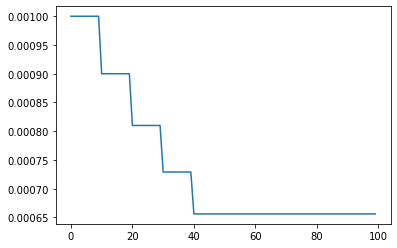

In [5]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)